<a href="https://colab.research.google.com/github/EAsgarov/DataScienceEcosystem/blob/main/Fork_of_Fork_of_Fork_of_Fork_of_RSFC_Yunbas_2541e4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

rohlik_sales_forecasting_challenge_v2_path = kagglehub.competition_download('rohlik-sales-forecasting-challenge-v2')
bakuer30_submission_model_path = kagglehub.dataset_download('bakuer30/submission-model')

print('Data source import complete.')


100%|██████████| 47.3M/47.3M [00:03<00:00, 14.7MB/s]

Extracting files...


100%|██████████| 569k/569k [00:00<00:00, 716kB/s]

Extracting files...
Data source import complete.


## Created by <a href="https://github.com/yunsuxiaozi">yunsuxiaozi</a> 2025/01/07

As a beginner friendly notebook, I will use as many text descriptions as possible to provide detailed explanations of my ideas.

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">1.Import Libraries</h1></span>

Due to the continuous updates of the <a href="https://github.com/yunsuxiaozi/Yunbase">Yunbase</a> GitHub repository, a static version is used <a href="https://www.kaggle.com/code/yunsuxiaozi/yunbase">here</a>.We are using version 13 here.

This is a framework I developed for the convenience of playing competitions and avoiding writing duplicate code. You can simply understand it as automl, although its current performance is not as good as automl.

In [3]:
#source_file_path = '/kaggle/input/yunbase/Yunbase/baseline.py'
#target_file_path = '/kaggle/working/baseline.py'
#with open(source_file_path, 'r', encoding='utf-8') as file:
#    content = file.read()
#with open(target_file_path, 'w', encoding='utf-8') as file:
#    file.write(content)

In [4]:
#!pip install -q --requirement /kaggle/input/yunbase/Yunbase/requirements.txt  \
#--no-index --find-links file:/kaggle/input/yunbase/

In [5]:
!pip install polars
!pip install tqdm
!pip install lightgbm
!pip install catboost
!pip install dill
!pip install optuna
!pip install colorama
#!pip install regex
#!pip install unidecode
!pip install gensim
#!pip install scipy
!pip install ftfy
!pip install nltk
!pip install emoji
!pip install pytorch_tabnet
!pip install cir-model
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 100.0 MB/s eta 0:00:00


In [6]:
#from baseline import Yunbase
import polars as pl#similar to pandas, but with better performance when dealing with large datasets.
import pandas as pd#read csv,parquet
import numpy as np#for scientific computation of matrices
from datetime import datetime, timedelta
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import gc#rubbish collection
import warnings#avoid some negligible errors
#The filterwarnings () method is used to set warning filters, which can control the output method and level of warning information.
warnings.filterwarnings('ignore')
import os
import random#provide some function to generate random_seed.
#set random seed,to make sure model can be recurrented.
def seed_everything(seed):
    np.random.seed(seed)#numpy's random seed
    random.seed(seed)#python built-in random seed
seed_everything(seed=2025)

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">2.Load Data</h1></span>

<a href="https://www.kaggle.com/code/yunsuxiaozi/rohlik-top1-solution/notebook">Here</a> is top1 solution in last competition. The feature engineering here refers to the top 1 solution.

The main task here is to read and concatenate the dataset, while also filling in some holidays that are not included in the calendar.

In order to ensure consistency between CV and LB,we only choose unique_id in test_data as train_data for model training.

In [7]:
print("< load dataset >")
train=pd.read_csv(rohlik_sales_forecasting_challenge_v2_path+"/sales_train.csv")
print(f"train.shape:{train.shape}")
test=pd.read_csv(rohlik_sales_forecasting_challenge_v2_path+"/sales_test.csv")
print(f"test.shape:{test.shape}")

print("< only use unique_id in testset >")
test_id=test['unique_id'].unique()
train=train[train['unique_id'].isin(test_id)]

print("< fill missing holiday >")
calendar=pd.read_csv(rohlik_sales_forecasting_challenge_v2_path+"/calendar.csv")
czech_holiday = [ # Prague
    (['03/31/2024', '04/09/2023', '04/17/2022', '04/04/2021', '04/12/2020'], 'Easter Day'),#loss
    (['05/12/2024', '05/10/2020', '05/09/2021', '05/08/2022', '05/14/2023'], "Mother Day"), #loss
]
brno_holiday = [ # Brno
    (['03/31/2024', '04/09/2023', '04/17/2022', '04/04/2021', '04/12/2020'], 'Easter Day'),#loss
    (['05/12/2024', '05/10/2020', '05/09/2021', '05/08/2022', '05/14/2023'], "Mother Day"), #loss
]


budapest_holidays = []
# Bavaria - Munich
munich_holidays = [
    (['03/30/2024', '04/08/2023', '04/16/2022', '04/03/2021'], 'Holy Saturday'),#loss
    (['05/12/2024', '05/14/2023', '05/08/2022', '05/09/2021'], 'Mother Day'),#loss
]

# Hesse - Frankfurt
frank_holidays = [
    (['03/30/2024', '04/08/2023', '04/16/2022', '04/03/2021'], 'Holy Saturday'),#loss
    (['05/12/2024', '05/14/2023', '05/08/2022', '05/09/2021'], 'Mother Day'),#loss
]




def fill_loss_holidays(df_fill, warehouses, holidays):
    df = df_fill.copy()
    for item in holidays:
        dates, holiday_name = item
        generated_dates = [datetime.strptime(date, '%m/%d/%Y').strftime('%Y-%m-%d') for date in dates]
        for generated_date in generated_dates:
            df.loc[(df['warehouse'].isin(warehouses)) & (df['date'] == generated_date), 'holiday'] = 1
            df.loc[(df['warehouse'].isin(warehouses)) & (df['date'] == generated_date), 'holiday_name'] = holiday_name
    #add features
    df['long_weekend'] = ((df['shops_closed'] == 1) & (df['shops_closed'].shift(1) == 1)).astype(np.int8)

    return df

calendar = fill_loss_holidays(df_fill=calendar, warehouses=['Prague_1', 'Prague_2', 'Prague_3'], holidays=czech_holiday)
calendar = fill_loss_holidays(df_fill=calendar, warehouses=['Brno_1'], holidays=brno_holiday)
calendar = fill_loss_holidays(df_fill=calendar, warehouses=['Munich_1'], holidays=munich_holidays)
calendar = fill_loss_holidays(df_fill=calendar, warehouses=['Frankfurt_1'], holidays=frank_holidays)
calendar = fill_loss_holidays(df_fill=calendar, warehouses=['Budapest_1'], holidays=budapest_holidays)
print(f"calendar.shape:{calendar.shape}")

print("< merge dataset >")
train=train.merge(calendar,on=['warehouse','date'],how='left')
test=test.merge(calendar,on=['warehouse','date'],how='left')

weights=pd.read_csv(rohlik_sales_forecasting_challenge_v2_path+"/test_weights.csv")
train=train.merge(weights,on='unique_id',how='left')
print(f"weights.shape:{weights.shape}")

inventory=pd.read_csv(rohlik_sales_forecasting_challenge_v2_path+"/inventory.csv")
train=train.merge(inventory,on=['warehouse','unique_id'],how='left')


test=test.merge(inventory,on=['warehouse','unique_id'],how='left')

train.head()

< load dataset >
train.shape:(4007419, 14)
test.shape:(47021, 12)
< only use unique_id in testset >
< fill missing holiday >
calendar.shape:(23016, 8)
< merge dataset >
weights.shape:(5390, 2)


,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,...,winter_school_holidays,school_holidays,long_weekend,weight,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,...,0,0,0,1.925596,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,...,0,0,0,1.925596,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,...,0,0,0,1.925596,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,...,0,0,0,1.925596,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,...,0,0,0,1.925596,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1


# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">3.Feature Engineer</h1></span>

Here,weekend is considered a holiday.I have conducted a more detailed classification of food and constructed shift and diff features.

We have done feature engineering on 'date' here, and also used the top 1 solution of Playground.<a href="https://www.kaggle.com/code/ivyzang/1st-place-solution-less-is-more/notebook">less is more</a>


The feature engineering here is quite messy. If you are interested, you can take a closer look.

In [8]:
print("< get weekend date >")
start_date_str = train['date'].min()
end_date_str = train['date'].max()
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
current_date = start_date
weekends = []
while current_date <= end_date:
    if current_date.weekday() == 5 or current_date.weekday() == 6:
        weekends.append(current_date.strftime('%Y-%m-%d'))
    current_date += timedelta(days=1)

< get weekend date >


In [9]:
def get_food_type(food):
    food_types = {
        "fruit": [
            "Apple", "Avocado", "Banana", "Cucumber", "Lemon", "Mango", "Melon",
            "Orange", "Pear", "Pineapple", "Pomegranate", "Grape", "Watermelon",
            "Blueberry", "Lime", "Zucchini", "Grapefruit", "Physalis", "Berry",
            "Tangerine", "Apricot", "Pomelo", "Blackberry", "Cherry", "Raspberry",
            "Passion fruit", "Date", "Plum", "Fig", "Cactus Fruit", "Peach",
            "Nectarine", "Strawberry", "Mandarin", "Persimmon", "Canteloupe",
            "Lamb's lettuce"
        ],
        "vegetable": [
            "Tomato", "Potato", "Mushroom", "Onion", "Lettuce", "Cabbage", "Carrot",
            "Pepper", "Bell Pepper", "Radish", "Pumpkin", "Broccoli", "Basil",
            "Cauliflower", "Leek", "Chive", "Eggplant", "Kohlrabi", "Asparagus",
            "Rosemary", "Mint", "Chicory", "Fennel", "Strawberry", "Raspberry",
            "Ginger", "Pak choi", "Green Bean", "Cress", "Pea", "Pomelo", "Chili",
            "Squash", "Paprika", "Nut", "Plantain", "Soybean sprout", "Cantaloupe"
        ],
        "meat": [
            "Chicken",
            "Pork",
         "Beef",
            "Turkey",
            "Mix meat",
            "Duck",
            "Plant meat",
            "Burger"
        ],
        "fish": [
            "Salmon",
            "Shrimp",
            "Surimi"
            ],
        "other": [
            "Herb", "Salad", "Parsley", "Garlic", "Beet", "Spinach", "Sweet Potato",
            "Thyme", "Snack", "Arugula", "Grapefruit", "Physalis", "Berry",
            "Shallot", "Corn", "Sprout", "Bean", "Cauliflower", "Leek", "Chive",
            "Eggplant", "Kohlrabi", "Asparagus", "Rosemary", "Mint", "Chicory",
            "Peach", "Nectarine", "Thyme", "Fennel", "Strawberry", "Raspberry",
            "Ginger", "Passion fruit", "Date", "Plum", "Fig", "Bell pepper",
            "Soup", "Cactus Fruit", "Pak choi", "Drink", "Pappudia", "Tangerine",
            "Apricot", "Pea", "Pomelo", "Bag", "Chili", "Blackberry", "Granadilla",
            "Cherry", "Squash", "Paprika", "Nut", "Plantain", "Mandarin",
            "Soybean sprout", "Soil", "Cantaloupe", "Green Bean", "Persimmon",
            "Cress", "Pepperoni", "Gooseberry", "Currant", "Flower"
        ],
          'Bakery':['Bread', 'Pastry', 'Roll', 'Baguette', 'Toust', 'Croissant', 'Tortilla',
           'Donut', 'Snack', 'Cake', 'Pretzel', 'Cracker', 'Muffin', 'Bagel',
           'Breadcrumb', 'Pita', 'Rice Cake', 'Bun', 'Waffle', 'Biscuit',
           'Sandwich', 'Cheese', 'Wrap', 'Breadcrumbs', 'Focaccia', 'Cookie',
           'Cream', 'Cornmeal', 'Dessert', 'Grain', 'Hot Dog', 'Pasta', 'Pizza',
           'Flatbread', 'Yogurt', 'Bakery', 'Lucki', 'Brioche']
    }
    for food_type,food_list in food_types.items():
        if food in food_list:
            return food_type
    return 'other'

In the autoregressive features, 14, 20, 28, and 35 are features that have a correlation with sales greater than 0.93 within one year, while 356,364,370 are features that have a correlation greater than 0.92 after one year, and cannot even reach 0.90 after two years, so they are not considered.


In [10]:
def FE(df):
    df['index']=np.arange(len(df))
    df=df.sort_values(['date']).reset_index(drop=True)

    print("< autoregression feature >")
    for gap in [14,20,28,35,356,364,370]:
        df[f'sales_shift{gap}']=df.groupby(['warehouse','name'])['sales'].shift(gap)

    print("< date feature >")

    df['date_copy']=df['date']
    df['date_copy']=pd.to_datetime(df['date_copy'])

    df['dayofyear']=df['date_copy'].dt.dayofyear
    df['sin_dayofyear']=np.sin(2*np.pi*df['dayofyear']/365)
    df['cos_dayofyear']=np.cos(2*np.pi*df['dayofyear']/365)

    df['dayofweek']=df['date_copy'].dt.dayofweek
    df['weekday'] = df['date_copy'].dt.weekday
    df['weekend']=(df['dayofweek']>4).astype(np.int8)
    df['sin_dayofweek']=np.sin(2*np.pi*df['dayofweek']/7)
    df['cos_dayofweek']=np.cos(2*np.pi*df['dayofweek']/7)

    dayofweek2mean={0: 0.1414975636804815,1: 0.13738876781429193,
    2: 0.14013498532762625,3: 0.15052082748144407,4: 0.16312265716870394,
    5: 0.13516123608364708,6: 0.13217396244380525}
    df['dayofweek']=df['dayofweek'].apply(lambda x:dayofweek2mean[x])

    df['weekofyear'] = df['date_copy'].dt.isocalendar().week
    df['sin_weekofyear']=np.sin(2*np.pi*df['weekofyear']/52)
    df['cos_weekofyear']=np.cos(2*np.pi*df['weekofyear']/52)

    df['year']=df['date_copy'].dt.year
    df['quarter']=df['date_copy'].dt.quarter
    df['sin_quarter']=np.sin(2*np.pi*df['quarter']/4)
    df['cos_quarter']=np.cos(2*np.pi*df['quarter']/4)

    df['month']=df['date_copy'].dt.month
    df['is_month_start'] = df['date_copy'].dt.is_month_start
    df['is_month_end'] = df['date_copy'].dt.is_month_end
    df['sin_month']=np.sin(2*np.pi*df['month']/12)
    df['cos_month']=np.cos(2*np.pi*df['month']/12)

    df['day']=df['date_copy'].dt.day
    df['dayofmonth']=df['day']//10
    df['sin_day']=np.sin(2*np.pi*df['day']/30)
    df['cos_day']=np.cos(2*np.pi*df['day']/30)

    print("< data clean >")
    #name:'Pastry_196'
    df['name_0']=df['name'].apply(lambda x:x.split("_")[0])
    df['name_1']=df['name'].apply(lambda x:x.split("_")[1])
    df.drop(['name'],axis=1,inplace=True)
    for i in range(2,5):
        df[f'L{i}_category_name_en']=df[f'L{i}_category_name_en'].apply(lambda x:x.split('_')[2])

    print("< store2country feature >")
    store2country = {
        'Budapest_1': 'Hungary',
        'Prague_2': 'Czechia',
        'Brno_1': 'Czechia',
        'Prague_1': 'Czechia',
        'Prague_3': 'Czechia',
        'Munich_1': 'Germany',
        'Frankfurt_1': 'Germany'
    }
    df['country']=df['warehouse'].apply(lambda x:store2country[x])

    print("< get food type >")
    df['L5_category_name_en']=df['name_1'].apply(lambda x:get_food_type(x))

    print("< add holiday >")
    #rohlik top1 solution:https://www.kaggle.com/code/yunsuxiaozi/rohlik-top1-solution/notebook
    rename_dict = {
        "Memorial Day for the Victims of the Holocaust": "Victims of the Holocaust",
        "Memorial Day for the Victims of the Communist Dictatorships": "Victims of the Communist",
        "Den vzniku samostatneho ceskoslovenskeho statu": "Den vzniku"
    }
    df['holiday_name'] = df['holiday_name'].replace(rename_dict)
    df.loc[(df['holiday']==1)&(df['holiday_name'].isna()),'holiday_name']='Easter Monday'
    datesx = ['03/31/2024', '04/09/2023', '04/17/2022', '04/04/2021', '04/12/2020']
    holidaysx = [datetime.strptime(date, '%m/%d/%Y') - timedelta(days=1) for date in datesx]
    warehouses = ['Prague_1', 'Prague_2', 'Prague_3']
    df.loc[(df['date'].isin(holidaysx)) & (df['warehouse'].isin(warehouses)), 'holiday'] = 1

    print("< add weekend feature >")
    df.loc[(df['holiday_name'].isna())&(df['date'].isin(weekends)),'holiday_name']='weekend'
    #simple weekend
    df['is_holiday']=(df['holiday_name']==df['holiday_name']).astype(np.int8)
    #holiday but not weekend
    df.loc[(df['is_holiday']==1)&(df['holiday_name']!='weekend'),'is_holiday']=2

    df['total_type_discount']=0
    for i in range(7):
        df['total_type_discount']+=df[f'type_{i}_discount']

    print("< time diff and shift feature >")

    for gap in [1,2]:
        for col in ['is_holiday','weekend']:
            df[col+f"_shift{gap}"]=df.groupby(['warehouse','unique_id','product_unique_id'])[col].shift(gap)

    for col in ['total_orders','sell_price_main','total_type_discount']:#'total_orders*sell_price_main'
        for agg in ['std','skew','max','median']:
            df[f'{agg}_{col}_each_name_WU_per_day']=df.groupby(['date','warehouse','unique_id','name_0','name_1'])[col].transform(agg)
            df[f'{agg}_{col}_each_name0_WU_per_day']=df.groupby(['date','warehouse','unique_id','name_0'])[col].transform(agg)
            df[f'{agg}_{col}_each_L1_WU_per_day']=df.groupby(['date','warehouse','unique_id','L1_category_name_en'])[col].transform(agg)
            df[f'{agg}_{col}_each_name0_W_per_day']=df.groupby(['date','warehouse','name_0'])[col].transform(agg)
            df[f'{agg}_{col}_each_name0_per_day']=df.groupby(['date','name_0'])[col].transform(agg)

            for gap in [1]:
                df[f'{agg}_{col}_each_name_WU_per_day_diff{gap}']=df.groupby(['warehouse','unique_id','name_0','name_1'])[f'{agg}_{col}_each_name_WU_per_day'].diff(gap)
                df[f'{agg}_{col}_each_name0_WU_per_day_diff{gap}']=df.groupby(['warehouse','unique_id','name_0','name_1'])[f'{agg}_{col}_each_name0_WU_per_day'].diff(gap)
                df[f'{agg}_{col}_each_L1_WU_per_day_diff{gap}']=df.groupby(['warehouse','unique_id','name_0','name_1'])[f'{agg}_{col}_each_L1_WU_per_day'].diff(gap)
                df[f'{agg}_{col}_each_name0_W_per_day_diff{gap}']=df.groupby(['warehouse','unique_id','name_0','name_1'])[f'{agg}_{col}_each_name0_W_per_day'].diff(gap)
                df[f'{agg}_{col}_each_name0_per_day_diff{gap}']=df.groupby(['warehouse','unique_id','name_0','name_1'])[f'{agg}_{col}_each_name0_per_day'].diff(gap)

    df=df.sort_values(['index']).reset_index(drop=True)

    df.drop(['index','date_copy'],axis=1,inplace=True)

    return df

total=pd.concat((train,test))
total=FE(total)
#baside target,columns in train.columns but not in test.columns
drop_cols=['availability']
total.drop([col for col in total.columns if total[col].isna().mean()>0.99]+drop_cols,axis=1,inplace=True)
train=total[:len(train)]
test=total[len(train):].drop(['sales','weight'],axis=1)
del total
gc.collect()
train['sales']=train['sales']/train['dayofweek']

print(f"train.shape:{train.shape},test.shape:{test.shape}")
train.head()

< autoregression feature >
< date feature >
< data clean >
< store2country feature >
< get food type >
< add holiday >
< add weekend feature >
< time diff and shift feature >
train.shape:(3477164, 150),test.shape:(47021, 148)


,unique_id,date,warehouse,total_orders,sales,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,...,median_total_type_discount_each_name_WU_per_day,median_total_type_discount_each_name0_WU_per_day,median_total_type_discount_each_L1_WU_per_day,median_total_type_discount_each_name0_W_per_day,median_total_type_discount_each_name0_per_day,median_total_type_discount_each_name_WU_per_day_diff1,median_total_type_discount_each_name0_WU_per_day_diff1,median_total_type_discount_each_L1_WU_per_day_diff1,median_total_type_discount_each_name0_W_per_day_diff1,median_total_type_discount_each_name0_per_day_diff1
0,4845,2024-03-10,Budapest_1,6436.0,123.624954,646.26,0.00000,0.0,0.0,0.0,...,0.15312,0.15312,0.15312,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,91.928912,455.96,0.00000,0.0,0.0,0.0,...,0.15025,0.15025,0.15025,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,244.173815,455.96,0.00000,0.0,0.0,0.0,...,0.15025,0.15025,0.15025,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,255.398671,646.26,0.20024,0.0,0.0,0.0,...,0.35336,0.35336,0.35336,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,220.202396,486.41,0.00000,0.0,0.0,0.0,...,0.15649,0.15649,0.15649,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
import requests
print("< merge last_year_gdp >")
def get_gdp_per_capita(country, year):
    alpha3={'China':'CN','Canada':'CAN','Argentina':'ARG',
            'Russian':'RUS','Germany':'DE','Czechia':'CZ',
            'Hungary':'HU','Japan': 'JPN','Italy':'ITA',
            'Estonia':'EST','Spain':'ESP','Singapore':'SGP',
            'Norway':'NOR','Kenya':'KEN','Finland':'FIN',
           }
    url = "https://api.worldbank.org/v2/country/{0}/indicator/NY.GDP.PCAP.CD?date={1}&format=json".format(
        alpha3[country], year)
    response = requests.get(url).json()
    return response[1][0]['value']

years,countrys,gdps=[],[],[]
for c in ['Hungary','Czechia','Germany']:
    for y in [2020,2021,2022,2023,2024]:
        years.append(y)
        countrys.append(c)
        gdps.append(np.log1p( get_gdp_per_capita(c,y-1)) )
year_country_gdp=pd.DataFrame({"year":years,'country':countrys,'last_year_gdp':gdps})
train=train.merge(year_country_gdp,on=['year','country'],how='left')
test=test.merge(year_country_gdp,on=['year','country'],how='left')

train = train[train['warehouse'].isin(['Munich_1'])]

train.head()

< merge last_year_gdp >


,unique_id,date,warehouse,total_orders,sales,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,...,median_total_type_discount_each_name0_WU_per_day,median_total_type_discount_each_L1_WU_per_day,median_total_type_discount_each_name0_W_per_day,median_total_type_discount_each_name0_per_day,median_total_type_discount_each_name_WU_per_day_diff1,median_total_type_discount_each_name0_WU_per_day_diff1,median_total_type_discount_each_L1_WU_per_day_diff1,median_total_type_discount_each_name0_W_per_day_diff1,median_total_type_discount_each_name0_per_day_diff1,last_year_gdp
31116,4167,2024-05-22,Munich_1,4422.0,178.185340,2.05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.903094
31117,4167,2023-09-06,Munich_1,2944.0,67.577700,2.05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.813501
31118,4167,2023-01-31,Munich_1,2814.0,125.046612,2.05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.813501
31119,4167,2023-02-03,Munich_1,3773.0,200.830471,2.05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.813501
31120,4167,2023-04-08,Munich_1,1853.0,125.627735,2.05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.813501


In [ ]:
#!pip install pytorch_tabnet
#!pip install spellchecker


In [ ]:
#!pip install indexer

In [12]:


import polars as pl#similar to pandas, but with better performance when dealing with large datasets.
import pandas as pd#read csv,parquet
import numpy as np#for scientific computation of matrices
from tqdm import tqdm#progress bar
from scipy.stats import kurtosis#calculate kurt
#powerful plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

#current supported kfold
from sklearn.model_selection import KFold,StratifiedKFold,StratifiedGroupKFold,GroupKFold
#metrics
from sklearn.metrics import roc_auc_score,f1_score,matthews_corrcoef
#models(lgb,xgb,cat,ridge,lr,tabnet)
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression
#fit(oof_preds,target)
#from cir_model import CenteredIsotonicRegression
from  lightgbm import LGBMRegressor,LGBMClassifier,log_evaluation,early_stopping
from catboost import CatBoostRegressor,CatBoostClassifier
from xgboost import XGBRegressor,XGBClassifier
from pytorch_tabnet.tab_model import TabNetRegressor,TabNetClassifier
import optuna#automatic hyperparameter optimization framework

import ast#parse Python list strings  transform '[a,b,c]' to [a,b,c]
import copy#copy object
import gc#rubbish collection
import dill#serialize and deserialize objects (such as saving and loading tree models)
from colorama import Fore, Style #print colorful text
import os#interact with operation system

#deal with text
import re#python's built-in regular expressions.
#from spellchecker import SpellChecker# spelling checker library
#from unidecode import unidecode#transform unicode to ASCII.
#gene(topic) similarity
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer#word2vec feature
import ftfy#fixes text for you,correct unicode issues.
import nltk #Natural Language toolkit
from nltk.corpus import stopwords#import english stopwords
import emoji#deal with emoji in natrual language
from sklearn.preprocessing import RobustScaler#(x-median)/IQR
from sklearn.decomposition import PCA,TruncatedSVD#Truncated Singular Value Decomposition

import warnings#avoid some negligible errors
#The filterwarnings () method is used to set warning filters, which can control the output method and level of warning information.
warnings.filterwarnings('ignore')

import random#provide some function to generate random_seed.
#set random seed,to make sure model can be recurrented.
def seed_everything(seed):
    np.random.seed(seed)#numpy's random seed
    random.seed(seed)#python built-in random seed
seed_everything(seed=2025)

In [53]:


class Yunbase():
    def __init__(self,num_folds:int=5,
                      n_repeats:int=1,
                      models:list[tuple]=[],
                      FE=None,
                      CV_sample=None,
                      group_col=None,
                      target_col:str='target',
                      weight_col:str='weight',
                      drop_cols:list[str]=[],
                      seed:int=2025,
                      objective:str='regression',
                      metric:str='mse',
                      nan_margin:float=0.95,
                      num_classes=None,
                      infer_size:int=10000,
                      save_oof_preds:bool=True,
                      save_test_preds:bool=True,
                      device:str='cpu',
                      one_hot_max:int=50,
                      custom_metric=None,
                      use_optuna_find_params:int=0,
                      optuna_direction=None,
                      early_stop:int=100,
                      use_pseudo_label:bool=False,
                      use_high_corr_feat:bool=True,
                      cross_cols:list[str]=[],
                      labelencoder_cols:list[str]=[],
                      list_stat:list[tuple]=[],
                      word2vec_models:list[tuple]=[],
                      text_cols:list[str]=[],
                      plot_feature_importance:bool=False,
                      log:int=100,
                      exp_mode:bool=False,
                      use_reduce_memory:bool=False,
                      use_data_augmentation:bool=False,
                      use_oof_as_feature:bool=False,
                      use_CIR:bool=False,
                      use_median_as_pred:bool=False,
                      use_scaler:bool=False,
                      use_TTA:bool=False,
                      use_eval_metric:bool=True,
                      feats_stat:list[tuple]=[],
                      target_stat:list[tuple]=[],
                      use_spellchecker:bool=False,
                      AGGREGATIONS:list=['nunique','count','min','max','first',
                                           'last', 'mean','median','sum','std',
                                         'skew','kurtosis'],
                )->None:
        """
        num_folds             :the number of folds for k-fold cross validation.
        n_repeats             :Here,we will modify the random seed of kfold and models to repeat
                               the cross validation several times.
        models                :Built in 3 GBDTs as baseline, you can also use custom models,
                               such as models=[(LGBMRegressor(**lgb_params),'lgb')]
        FE                    :In addition to the built-in feature engineer, you can also customize feature engineer.
        CV_sample             :This function is for X_train and y_train,sample_weight in cross validation.
                               In order to make the evaluation metrics of oof as accurate as possible,
                               this function is not executed for X_valid and y_valid.
                               You can perform downsampling, upsampling, taking the first 10000 data
                               points, and other operations you want here, and
                               ultimately return any X_train or y_train,sample_weight.
        group_col             :if you want to use groupkfold,then define this group_col.
        target_col            :the column that you want to predict.
        weight_col            :When training the model, give each sample a different weight.
                               If you don't set it, the weight of each sample will default to 1.
        drop_cols             :The column to be deleted after all feature engineering is completed.
        seed                  :random seed.
        objective             :what task do you want to do?regression,binary or multi_class?
        metric                :metric to evaluate your model.
        nan_margin            :when the proportion of missing values in a column is greater than, we delete this column.
        num_classes           :if objectibe is multi_class,you should define this class.
        infer_size            :the test data might be large,we can predict in batches.
        save_oof_preds        :you can save OOF for offline study.
        save_test_preds       :you can save test_preds.For multi classification tasks,
                               the predicted result is the category.If you need to save the probability of the test_data,
                               you can save test_preds.
        device                :GBDT can training on GPU,you can set this parameter like NN.
        one_hot_max           :If the nunique of a column is less than a certain value, perform one hot encoder.
        custom_metric         :your custom_metric,when objective is multi_class,y_pred in custom(y_true,y_pred) is probability.
        use_optuna_find_params:count of use optuna find best params,0 is not use optuna to find params.
                               Currently only LGBM is supported.
        optuna_direction      :'minimize' or 'maximize',when you use custom metric,you need to define
                               the direction of optimization.
        early_stop            :Common parameters of GBDT.
        use_pseudo_label      :Whether to use pseudo labels.When it is true,adding the test data
                               to the training data and training again after obtaining the predicted
                               results of the test data.
        use_high_corr_feat    :whether to use high correlation features or not.
        cross_cols            :Construct features for adding, subtracting, multiplying, and dividing these columns.
        labelencoder_cols     :Convert categorical string variables into [1,2,……,n].
        list_stat             :example:[(list_col:str='step_list',list_gap:list[int]=[1,2,4])].
                               list_col:If the data in a column is a list or str(list),
                               such as [] or '[]', this can be used to extract diff and
                               shift features for list_cols.
        word2vec_models       :Use models such as tfidf to extract features of string columns.
                               example:word2vec_models=[(TfidfVectorizer(max_features=250,
                                        ngram_range=(2,3)),col,model_name,use_svd)],
                               use_svd:use Truncated Singular value decomposition to word2vec features.
        text_cols             :extract features of words, sentences, and paragraphs from text here.
        plot_feature_importance:after model training,whether print feature importance or not
        log                   :log trees are trained in the GBDT model to output a validation set score once.
        exp_mode              :In regression tasks, the distribution of target_col is a long tail distribution,
                               and this parameter can be used to perform log transform on the target_col.
        use_reduce_memory     :if use function reduce_mem_usage(),then set this parameter True.
        use_data_augmentation :if use data augmentation,During cross validation, the training data
                               will undergo PCA transformation followed by inverse transformation.
        use_oof_as_feature    :Train the next model using the oof_preds obtained from the previous
                               model as features, and the same applies to inference.
        use_CIR               :use CenteredIsotonicRegression to fit oof_preds and target.
        use_median_as_pred    :use median.(axis=0)) instead of mean.(axis=0)
        use_scaler            :use robust scaler to deal with outlier.
        use_eval_metric       : use 'eval_metric' when training lightgbm or xgboost.
        use_TTA               :use 'test time augmentation'.It is to use
                               data augmentation operations in the inference process
        feats_stat            : (group_col,feature_col,aggregation_list)
                               example:feats_stat = [ ('id','up_time', ['min', 'max'])   ]
        target_stat           :We can use target's AGGREGATIONS to encode categorical variables.
                               In order to obtain a reliable CV, this operation is performed separately
                               for the training set and validation set in cross validation.
                               example:target_stat = [ (group_col,target_col, aggregation_list)   ]
                               To make it more versatile, you can also use  other variables
                               besides target to encode categorical variables.
        use_spellchecker      :use SpellChecker to correct word in text.
        AGGREGATIONS          :['nunique','count','min','max','first','last',
                               'mean','median','sum','std','skew',kurtosis,q1,q3],
        """

        #currented supported metric
        self.supported_metrics=['custom_metric',#your custom_metric
                                'mae','rmse','mse','medae','rmsle','msle','mape','r2','smape',#regression
                                'auc','logloss','f1_score','mcc',#binary metric
                                'accuracy','multi_logloss',#multi_class or classification
                               ]
        #current supported models
        self.supported_models=['lgb','cat','xgb','ridge','LinearRegression','LogisticRegression','tabnet',
                                'Word2Vec','tfidfvec','countvec',
                              ]
        #current supported kfold.
        self.supported_kfolds=['KFold','GroupKFold','StratifiedKFold','StratifiedGroupKFold','purged_CV']
        #current supported objective.
        self.supported_objectives=['binary','multi_class','regression']

        print(f"Currently supported metrics:{self.supported_metrics}")
        print(f"Currently supported models:{self.supported_models}")
        print(f"Currently supported kfolds:{self.supported_kfolds}")
        print(f"Currently supported objectives:{self.supported_objectives}")

        self.num_folds=num_folds
        self.n_repeats=n_repeats
        self.seed=seed
        self.models=models
        self.target_col=target_col
        self.group_col=group_col

        self.FE=FE
        self.CV_sample=CV_sample
        self.drop_cols=drop_cols

        self.objective=objective.lower()
        #binary multi_class,regression
        if self.objective not in self.supported_objectives:
            raise ValueError("Wrong or currently unsupported objective.")

        self.custom_metric=custom_metric#function
        if self.custom_metric!=None:
            self.metric=self.custom_metric.__name__
        else:
            self.metric=metric.lower()
        if self.metric not in self.supported_metrics and self.custom_metric==None:
            raise ValueError("Wrong or currently unsupported metric,You can customize the evaluation metrics using 'custom_metric'.")

        self.nan_margin=nan_margin
        if self.nan_margin<0 or self.nan_margin>1:
            raise ValueError("nan_margin must be within the range of 0 to 1.")
        self.infer_size=infer_size
        if self.infer_size<=0 or type(self.infer_size) is not int:
            raise ValueError("infer size must be greater than 0 and must be int.")

        self.save_oof_preds=save_oof_preds
        self.save_test_preds=save_test_preds

        self.num_classes=num_classes
        self.device=device.lower()
        if (self.objective=='binary') and self.num_classes!=2:
            raise ValueError("num_classes must be 2.")
        elif (self.objective=='multi_class') and (self.num_classes==None):
            raise ValueError("num_classes must be a number(int).")
        self.one_hot_max=one_hot_max

        self.use_optuna_find_params=use_optuna_find_params
        self.optuna_direction=optuna_direction
        self.direction2metric={
            'maximize':['accuracy','auc','f1_score','mcc',#classification
                        'r2'#regression
                       ],
            'minimize':['medae','mape','mae','rmse','mse','rmsle','msle','smape',#regression
                        'logloss','multi_logloss'#classification
                       ]
        }

        if (self.use_optuna_find_params) and (self.custom_metric!=None) and self.optuna_direction not in ['minimize','maximize']:
            raise ValueError("optuna_direction must be 'minimize' or 'maximize'.")
        self.early_stop=early_stop
        self.test=None#test data will be replaced when call predict function.
        self.use_pseudo_label=use_pseudo_label
        self.use_high_corr_feat=use_high_corr_feat
        self.cross_cols=cross_cols
        self.labelencoder_cols=labelencoder_cols
        self.list_stat=list_stat
        self.list_cols=[l[0] for l in self.list_stat]

        self.word2vec_models=word2vec_models
        for i in range(len(self.word2vec_models)):
            #default use_svd=False
            if len(self.word2vec_models[i])==3:#(model,col,model_name)
                tup=self.word2vec_models[i]
                self.word2vec_models[i]=(tup[0],tup[1],tup[2],False)

        self.word2vec_cols=[col for (model,col,model_name,use_svd) in self.word2vec_models]#origin cols that need to use in tfidf model.
        self.text_cols=text_cols#extract features of words, sentences, and paragraphs from text here.
        #to perform only one clean_text operation
        self.param_text=list(set(self.word2vec_cols+self.text_cols))

        self.plot_feature_importance=plot_feature_importance
        #Due to the presence of special characters in some column names,
        #they cannot be directly passed into the LGB model training, so conversion is required
        self.log=log
        self.exp_mode=exp_mode
        #when log transform, it is necessary to ensure that the minimum value of the target is greater than 0.
        #so target=target-min_target. b is -min_target.
        self.exp_mode_b=0
        if (self.objective!='regression') and (self.exp_mode==True):
            raise ValueError("exp_mode must be False in classification task.")
        self.use_reduce_memory=use_reduce_memory
        self.use_data_augmentation=use_data_augmentation
        self.use_oof_as_feature=use_oof_as_feature
        self.use_CIR=use_CIR
        self.use_median_as_pred=use_median_as_pred
        self.use_scaler=use_scaler
        self.use_eval_metric=use_eval_metric
        self.use_TTA=use_TTA
        self.use_spellchecker=use_spellchecker

        attritubes=['save_oof_preds','save_test_preds','exp_mode',
                    'use_reduce_memory','use_data_augmentation','use_scaler',
                    'use_oof_as_feature','use_CIR','use_median_as_pred','use_eval_metric',
                    'use_spellchecker','use_TTA'
                   ]
        for attr in attritubes:
            if getattr(self,attr) not in [True,False]:
                raise ValueError(f"{attr} must be True or False.")

        if self.use_oof_as_feature and self.use_pseudo_label:
            raise ValueError(f"use_oof_as_feature and use_pseudo_label cannot be both True at the same time.")

        self.feats_stat=feats_stat
        self.target_stat=target_stat
        #common AGGREGATIONS
        self.AGGREGATIONS = AGGREGATIONS

        #If inference one batch of data at a time requires repeatedly loading the model,
        #it will increase the program's running time.we need to save  in dictionary when load.
        self.trained_models=[]#trained model
        self.trained_CIR=[]#trained CIR model
        self.trained_le={}
        self.trained_wordvec={}
        self.trained_svd={}
        self.trained_scaler={}
        self.trained_category_transformer={}
        self.onehot_valuecounts={}
        #make folder to save model trained.such as GBDT,word2vec.
        self.model_save_path="Yunbase_info/"
        if not os.path.exists(self.model_save_path):
            os.mkdir(self.model_save_path)

        self.eps=1e-15#clip (eps,1-eps) | divide by zero.
        self.category_cols=[]
        self.high_corr_cols=[]
        #to make sure column's dtype in train.csv is same as the column's dtype in test.csv.
        #example:https://www.kaggle.com/competitions/home-credit-credit-risk-model-stability
        self.col2dtype={}
        self.weight_col=weight_col

    def get_params(self,):
        params_dict={'num_folds':self.num_folds,'seed':self.seed,'nan_margin':self.nan_margin,
                     'models':self.models,'objective':self.objective,
                     'metric':self.metric,'custom_metric':self.custom_metric,
                     'drop_cols':self.drop_cols,'group_col':self.group_col,'num_classes':self.num_classes,
                     'target_col':self.target_col,'infer_size':self.infer_size,'device':self.device,
                     'cross_cols':self.cross_cols,'labelencoder_cols':self.labelencoder_cols,
                     #2025/01/06 need to be updated.

                     'text_cols':self.text_cols,'plot_feature_importance':self.plot_feature_importance,
                     'save_oof_preds':self.save_oof_preds,'save_test_preds':self.save_test_preds,
                     'one_hot_max':self.one_hot_max,'use_optuna_find_params':self.use_optuna_find_params,
                     'optuna_direction':self.optuna_direction,'early_stop':self.early_stop,
                     'use_pseudo_label':self.use_pseudo_label,'use_high_corr_feat':self.use_high_corr_feat,
                     'log':self.log,'exp_mode':self.exp_mode,'use_reduce_memory':self.use_reduce_memory,
                     'use_TTA':self.use_TTA,
                     'AGGREGATIONS':self.AGGREGATIONS,'category_cols':self.category_cols,
              }
        return params_dict

    def PrintColor(self,text:str='',color = Fore.BLUE)->None:
        print(color + text + Style.RESET_ALL)
    #save models after training
    def pickle_dump(self,obj, path:str)->None:
        #open path,binary write
        with open(path, mode="wb") as f:
            dill.dump(obj, f, protocol=4)
    #load models when inference
    def pickle_load(self,path:str):
        #open path,binary read
        with open(path, mode="rb") as f:
            data = dill.load(f)
            return data

    #sample AGGREGATIONS
    def q1(self,x):
        return x.quantile(0.25)
    def q3(self,x):
        return x.quantile(0.75)

    #Time data cannot use this augmentation,as features such as year, month, and day are discrete variables.
    def pca_augmentation(self,X:pd.DataFrame,y=None,target_col:str=''):
        if type(y)!=pd.DataFrame:#y=None
            origin_data=X.copy()
        else:#
            origin_data=pd.concat((X,y),axis=1)
        n_components=np.clip( int(origin_data.shape[1]*0.8),1,X.shape[1])
        pca=PCA(n_components=n_components)
        pca_data=pca.fit_transform(origin_data)
        aug_data=pca.inverse_transform(pca_data)
        aug_data=pd.DataFrame(aug_data)
        if type(y)!=pd.DataFrame:#y=None
            aug_data.columns=list(X.columns)
        else:
            aug_data.columns=list(X.columns)+[target_col]
        del origin_data,pca,pca_data
        gc.collect()

        return aug_data

    #Traverse all columns of df, modify data types to reduce memory usage
    def reduce_mem_usage(self,df:pd.DataFrame, float16_as32:bool=True)->pd.DataFrame:
        #memory_usage()是df每列的内存使用量,sum是对它们求和, B->KB->MB
        start_mem = df.memory_usage().sum() / 1024**2
        print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
        for col in df.columns:#遍历每列的列名
            col_type = df[col].dtype#列名的type
            if col_type != object and str(col_type)!='category':#不是object也就是说这里处理的是数值类型的变量
                c_min,c_max = df[col].min(),df[col].max() #求出这列的最大值和最小值
                if str(col_type)[:3] == 'int':#如果是int类型的变量,不管是int8,int16,int32还是int64
                    #如果这列的取值范围是在int8的取值范围内,那就对类型进行转换 (-128 到 127)
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    #如果这列的取值范围是在int16的取值范围内,那就对类型进行转换(-32,768 到 32,767)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    #如果这列的取值范围是在int32的取值范围内,那就对类型进行转换(-2,147,483,648到2,147,483,647)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    #如果这列的取值范围是在int64的取值范围内,那就对类型进行转换(-9,223,372,036,854,775,808到9,223,372,036,854,775,807)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:#如果是浮点数类型.
                    #如果数值在float16的取值范围内,如果觉得需要更高精度可以考虑float32
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        if float16_as32:#如果数据需要更高的精度可以选择float32
                            df[col] = df[col].astype(np.float32)
                        else:
                            df[col] = df[col].astype(np.float16)
                    #如果数值在float32的取值范围内，对它进行类型转换
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    #如果数值在float64的取值范围内，对它进行类型转换
                    else:
                        df[col] = df[col].astype(np.float64)
        #calculate memory after optimization
        end_mem = df.memory_usage().sum() / 1024**2
        print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
        print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
        return df

    ############text preprocessor
    def clean_text(self,text:str='')->str:
        ############################## fix text #######################################################
        #transform “你好。” to 'NI HAO.'
        text = unidecode(text)
        #transform emoji to " "+text+" ".
        text=emoji.demojize(text,delimiters=(" ", " "))
        #correct unicode issues.
        text=ftfy.fix_text(text)
        #lower         example:'Big' and 'big'
        text=text.lower()
        ############################## remove meaningless text ########################################
        #remove <b>  <p> meaningless
        html=re.compile(r'<.*?>')
        text=html.sub(r'',text)
        #remove url '\w+':(word character,[a-zA-Z0-9_])
        text=re.sub("http\w+",'',text)
        #remove @yunsuxiaozi   person_name
        text=re.sub("@\w+",'',text)
        #drop single character,they are meaningless. 'space a space'
        text=re.sub("\s[a-z]\s",'',text)
        #remove number
        #text=re.sub("\d+",'',text)
        #drop english stopwords,they are meaningless.
        english_stopwords = stopwords.words('english')
        text_list=text.split(" ")
        text_list=[t for t in text_list if t not in english_stopwords]
        text=" ".join(text_list)
        #drop space front and end.
        text=text.strip()
        return text

    def text2word(self,text:str='hello world!'):
        return re.split(r'\.|\?|!|\s|\n|,',text)
    def text2sentence(self,text:str='hello world!'):
        return re.split(r'\.|\?|\!|\n',text)
    def text2paragraph(self,text:str='hello world!'):
        return text.split("\n")
    #3 text readable index
    def ARI(self,text):
        characters=len(text)
        words=len(self.text2word(text))
        sentence=len(self.text2sentence(text))
        ari_score=4.71*(characters/words)+0.5*(words/sentence)-21.43
        return ari_score
    def McAlpine_EFLAW(self,text):
        W=len(self.text2word(text))
        S=len(self.text2sentence(text))
        mcalpine_eflaw_score=(W+S*W)/S
        return mcalpine_eflaw_score
    def CLRI(self,text):
        characters=len(text)
        words=len(self.text2word(text))
        sentence=len(self.text2sentence(text))
        L=100*characters/words
        S=100*sentence/words
        clri_score=0.0588*L-0.296*S-15.8
        return clri_score

    def text_correct(self,text:str='hello world!'):
        spell = SpellChecker()
        words = self.text2word(text)
        punctuation=['.','?','!',' ','\n',',']
        wordssplit=[text[i] for i in range(len(text)) if text[i] in punctuation]
        fixed_words=[spell.correction(word) for word in words]
        error_cnt=sum([1 for i in range(len(words)) if words[i]!=fixed_words[i]])
        fixed_text=[]
        for i in range(len(wordssplit)):
            fixed_text.append(fixed_words[i])
            fixed_text.append(wordssplit[i])
        fixed_text="".join(fixed_text)
        return error_cnt,fixed_text

    ############text Feature Engineer
    def text_FE(self,df:pd.DataFrame,text_col:str='text'):
        df['index']=np.arange(len(df))
        #correct text
        if self.use_spellchecker:
            self.PrintColor(f"-> for column {text_col} text correct",color=Fore.YELLOW)
            texts=df[text_col].values
            error_cnts=np.zeros(len(texts))
            for i in tqdm(range(len(texts))):
                error_cnts[i],texts[i]=self.text_correct(texts[i])
            df[f'{text_col}_error_cnts']=error_cnts

        df[text_col+"_ARI"]=df[text_col].apply(lambda x:self.ARI(x))
        df[text_col+"_CLRI"]=df[text_col].apply(lambda x:self.CLRI(x))
        df[text_col+"_McAlpine_EFLAW"]=df[text_col].apply(lambda x:self.McAlpine_EFLAW(x))
        #split by ps
        ps='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
        for i in range(len(ps)):
            df[text_col+f"split_ps{i}_count"]=df[text_col].apply(lambda x:len(x.split(ps[i])))

        self.PrintColor(f"-> for column {text_col} word feature",color=Fore.RED)
        text_col_word_df=df[['index',text_col]].copy()
        #get word_list   [index,tcol,word_list]
        text_col_word_df[f'{text_col}_word']=text_col_word_df[text_col].apply(lambda x:self.text2word(x))
        #[index,single_word]
        text_col_word_df=text_col_word_df.explode(f'{text_col}_word')[['index',f'{text_col}_word']]
        #[index,single_word,single_word_len]
        text_col_word_df[f'{text_col}_word_len'] = text_col_word_df[f'{text_col}_word'].apply(len)
        #data clean [index,single_word,single_word_len]
        text_col_word_df=text_col_word_df[text_col_word_df[f'{text_col}_word_len']!=0]
        #for word features, extract the difference in length between the two words before and after.
        group_cols=[f'{text_col}_word_len']
        for gap in [1]:
            for col in [f'{text_col}_word_len']:
                text_col_word_df[f'{col}_diff{gap}']=text_col_word_df.groupby(['index'])[col].diff(gap)
                group_cols.append(f'{col}_diff{gap}')
        text_col_word_agg_df = text_col_word_df[['index']+group_cols].groupby(['index']).agg(self.AGGREGATIONS)
        text_col_word_agg_df.columns = ['_'.join(x) for x in text_col_word_agg_df.columns]
        df=df.merge(text_col_word_agg_df,on='index',how='left')

        self.PrintColor(f"-> for column {text_col} sentence feature",color=Fore.RED)
        text_col_sent_df=df[['index',text_col]].copy()
        #get sent_list   [index,tcol,sent_list]
        text_col_sent_df[f'{text_col}_sent']=text_col_sent_df[text_col].apply(lambda x: self.text2sentence(x))
        #[index,single_sent]
        text_col_sent_df=text_col_sent_df.explode(f'{text_col}_sent')[['index',f'{text_col}_sent']]
        #[index,single_sent,single_sent_len]
        text_col_sent_df[f'{text_col}_sent_len'] = text_col_sent_df[f'{text_col}_sent'].apply(len)
        text_col_sent_df[f'{text_col}_sent_word_count'] = text_col_sent_df[f'{text_col}_sent'].apply(lambda x:len(re.split('\\ |\\,',x)))
        #data clean [index,single_sent,single_sent_len]
        group_cols=[f'{text_col}_sent_len',f'{text_col}_sent_word_count']
        for gcol in group_cols:
            text_col_sent_df=text_col_sent_df[text_col_sent_df[gcol]!=0]
        #for sent features, extract the difference in length between the two sents before and after.
        for gap in [1]:
            for col in [f'{text_col}_sent_len',f'{text_col}_sent_word_count']:
                text_col_sent_df[f'{col}_diff{gap}']=text_col_sent_df.groupby(['index'])[col].diff(gap)
                group_cols.append(f'{col}_diff{gap}')
        text_col_sent_agg_df = text_col_sent_df[['index']+group_cols].groupby(['index']).agg(self.AGGREGATIONS)
        text_col_sent_agg_df.columns = ['_'.join(x) for x in text_col_sent_agg_df.columns]
        df=df.merge(text_col_sent_agg_df,on='index',how='left')

        self.PrintColor(f"-> for column {text_col} paragraph feature",color=Fore.RED)
        text_col_para_df=df[['index',text_col]].copy()
        #get para_list   [index,tcol,para_list]
        text_col_para_df[f'{text_col}_para']=text_col_para_df[text_col].apply(lambda x: self.text2paragraph(x))
        #[index,single_para]
        text_col_para_df=text_col_para_df.explode(f'{text_col}_para')[['index',f'{text_col}_para']]
        text_col_para_df[f'{text_col}_para_len'] = text_col_para_df[f'{text_col}_para'].apply(len)
        text_col_para_df[f'{text_col}_para_sent_count'] = text_col_para_df[f'{text_col}_para'].apply(lambda x: len(re.split('\\.|\\?|\\!',x)))
        text_col_para_df[f'{text_col}_para_word_count'] = text_col_para_df[f'{text_col}_para'].apply(lambda x: len(re.split('\\.|\\?|\\!\\ |\\,',x)))
        #data clean [index,single_sent,single_sent_len]
        group_cols=[f'{text_col}_para_len',f'{text_col}_para_sent_count',f'{text_col}_para_word_count']
        for gcol in group_cols:
            text_col_para_df=text_col_para_df[text_col_para_df[gcol]!=0]
        #for sent features, extract the difference in length between the two sents before and after.
        for gap in [1]:
            for col in [f'{text_col}_para_len',f'{text_col}_para_sent_count',f'{text_col}_para_word_count']:
                text_col_para_df[f'{col}_diff{gap}']=text_col_para_df.groupby(['index'])[col].diff(gap)
                group_cols.append(f'{col}_diff{gap}')
        text_col_para_agg_df = text_col_para_df[['index']+group_cols].groupby(['index']).agg(self.AGGREGATIONS)
        text_col_para_agg_df.columns = ['_'.join(x) for x in text_col_para_agg_df.columns]
        df=df.merge(text_col_para_agg_df,on='index',how='left')
        df.drop(['index'],axis=1,inplace=True)
        return df

    #basic Feature Engineer,mode='train' or 'test' ,drop_cols is other cols you want to delete.
    def base_FE(self,df:pd.DataFrame,mode:str='train',drop_cols:list[str]=[])->pd.DataFrame:
        if self.FE!=None:
            #use your custom metric first
            df=self.FE(df)

        #clean text
        for pt_col in tqdm(self.param_text):
            self.PrintColor(f"-> for column {pt_col} text clean",color=Fore.YELLOW)
            df[pt_col]=(df[pt_col].fillna('nan'))
            if df[pt_col].nunique()>0.5*len(df):
                df[pt_col]=df[pt_col].apply(lambda x:self.clean_text(x))
            else:#use dict to clean,save time.
                text2clean={}
                for text in df[pt_col].unique():
                    text2clean[text]=self.clean_text(text)
                df[pt_col]=df[pt_col].apply(lambda x:text2clean.get(x,'nan'))
                del text2clean
                gc.collect()

        #text feature extract,such as word,sentence,paragraph.
        #The reason why it needs to be done earlier is that it will generate columns such as nunique=1 or
        #object that need to be dropped, so it needs to be placed before finding these columns.
        if len(self.text_cols):
            print("< text column's feature >")
            for tcol in self.text_cols:
                df=self.text_FE(df,tcol)

        if mode=='train':
            #missing value
            self.nan_cols=[col for col in df.columns if df[col].isna().mean()>self.nan_margin]

            #nunique=1
            self.unique_cols=[]
            for col in df.drop(self.drop_cols+self.list_cols+\
                               [self.weight_col,self.group_col,self.target_col],axis=1,errors='ignore').columns:
                if(df[col].nunique()<2):#maybe np.nan
                    self.unique_cols.append(col)
                #max_value_counts's count
                elif len(list(df[col].value_counts().to_dict().items()))>0:
                    if list(df[col].value_counts().to_dict().items())[0][1]>=len(df)*0.99:
                        self.unique_cols.append(col)

            #object dtype
            self.object_cols=[col for col in df.drop(self.drop_cols+self.category_cols,axis=1,errors='ignore').columns if (df[col].dtype==object) and (col not in [self.group_col,self.target_col])]
            #one_hot_cols
            self.one_hot_cols=[]
            self.nunique_2_cols=[]
            for col in df.drop(
                [self.target_col,self.group_col,self.weight_col]+\
                self.list_cols+self.category_cols+self.drop_cols
                ,axis=1,errors='ignore'
            ).columns:
                if (df[col].dtype==object) and not (
                    #such as sin_month,month have already been onehot.
                    col.startswith('sin') or col.startswith('cos') or
                    #AGGREGATION don't use onehot.
                    col.endswith('_nunique') or col.endswith('_count') or
                    col.endswith('_min') or col.endswith('_max') or
                    col.endswith('_first') or col.endswith('_last') or
                    col.endswith('_mean') or col.endswith('_median') or
                    col.endswith('_sum') or col.endswith('_std') or col.endswith('_skew') or
                    #q0:0.05,q1:0.25,q2:0.5,q3:0.75,q4:0.95
                    col.endswith('_kurtosis') or col.endswith('_q0') or col.endswith('_q1') or
                    col.endswith('_q2') or col.endswith('_q3') or col.endswith('_q4')
                    ):
                    if (df[col].nunique()<self.one_hot_max) and (df[col].nunique()>2):
                        self.one_hot_cols.append([col,list(df[col].value_counts().to_dict().keys())])
                    elif (self.one_hot_max>=2) and (df[col].nunique()==2):
                        self.nunique_2_cols.append([col,list(df[col].unique())[0]])

        df=pl.from_pandas(df)
        if self.one_hot_max>1:
            print("< one hot encoder >")
            for i in range(len(self.one_hot_cols)):
                col,nunique=self.one_hot_cols[i]
                for u in nunique:
                    df=df.with_columns((pl.col(col)==u).cast(pl.Int8).alias(f"{col}_{u}"))
                #one_hot_value_count
                try:
                    col_valuecounts=self.onehot_valuecounts[col]
                except:
                    col_valuecounts=df[col].value_counts().to_dict()
                    new_col_valuecounts={}
                    for k,v in zip(col_valuecounts[col],col_valuecounts['count']):
                        new_col_valuecounts[k]=v
                    col_valuecounts=new_col_valuecounts
                    self.onehot_valuecounts[col]=col_valuecounts
                df=df.with_columns(pl.col(col).replace(col_valuecounts,default=np.nan).alias(col+"_valuecounts"))
                df=df.with_columns((pl.col(col+"_valuecounts")>=5)*pl.col(col+"_valuecounts"))
            for i in range(len(self.nunique_2_cols)):
                c,u=self.nunique_2_cols[i]
                df=df.with_columns((pl.col(c)==u).cast(pl.Int8).alias(f"{c}_{u}"))
        df=df.to_pandas()

        #category columns
        for col in self.category_cols:
            #preprocessing
            df[col]=df[col].apply(lambda x:str(x).lower())
            df=self.label_encoder(df,label_encoder_cols=[col],fold=self.num_folds)
            df[col]=df[col].astype('category')

        if len(self.list_stat):
            print("< list column's feature >")
            for (l_col,l_gaps) in self.list_stat:
                try:#if str(list),transform '[a,b]' to [a,b]
                    df[l_col]=df[l_col].apply(lambda x:ast.literal_eval(x))
                except:#origin data is list or data can't be parsed.
                    #<class 'numpy.ndarray'> [10103]
                    if not isinstance(list(df[l_col].dropna().values[0]),list):
                        raise ValueError(f"col '{l_col}' is not a list.")

                #add index,data of list can groupby index.
                df['index']=np.arange(len(df))
                #construct origin feats
                list_col_df=df.copy().explode(l_col)[['index',l_col]]
                list_col_df[l_col]=list_col_df[l_col].astype(np.float32)

                group_cols=[l_col]
                for gap in l_gaps:
                    self.PrintColor(f"-> for column {l_col} gap{gap}",color=Fore.RED)
                    list_col_df[f"{l_col}_gap{gap}"]=list_col_df.groupby(['index'])[l_col].diff(gap)
                    group_cols.append( f"{l_col}_gap{gap}" )

                list_col_agg_df = list_col_df[['index']+group_cols].groupby(['index']).agg(self.AGGREGATIONS)
                list_col_agg_df.columns = ['_'.join(x) for x in list_col_agg_df.columns]
                df=df.merge(list_col_agg_df,on='index',how='left')
                df[f'{l_col}_len']=df[l_col].apply(len)

                for gcol in group_cols:
                    if (f'{gcol}_max' in df.columns) and (f'{gcol}_min' in df.columns):
                        df[f'{gcol}_ptp']=df[f'{gcol}_max']-df[f'{gcol}_min']
                    if (f'{gcol}_mean' in df.columns) and (f'{gcol}_std' in df.columns):
                        df[f'{gcol}_mean_divide_{gcol}_std']=df[f'{gcol}_mean']/(df[f'{gcol}_std']+self.eps)

                col_list=df[l_col].values
                max_k=10
                res=[]
                for i in range(len(df)):
                    #{1:count2,2:count4,3:count1}
                    vs,cs = np.unique(col_list[i], return_counts=True)
                    res_=[]
                    for k in range(max_k):
                        res_.append(np.sum(cs==k+1))
                    res.append(res_)
                res=np.array(res)
                for k in range(max_k):
                    df[f"{l_col}_valuecount_equal{k+1}_cnt"]=res[:,k]

                #drop index after using.
                df.drop(['index'],axis=1,inplace=True)

        if len(self.feats_stat):
            print("< groupby feature >")
            for items in tqdm(self.feats_stat):
                group_col,feature_col,AGGREGATIONS=items
                #simple agg or cross agg
                agg1,agg2=[],[]
                for agg in AGGREGATIONS:
                    if type(agg)==str:
                        agg_name=agg
                    else:#function
                        agg_name=agg.__name__
                    if ('+' in agg_name) or ('-' in agg_name) or ('*' in agg_name) or ('/' in agg_name):
                        agg2.append(agg)
                    else:
                        agg1.append(agg)
                if type(group_col)==str:
                    choose_cols=[group_col,feature_col]
                else:#such as list
                    choose_cols=group_col+[feature_col]
                #deal with agg1
                agg_df = df[choose_cols].groupby(group_col).agg(agg1)
                agg_df.columns = ['_'.join(x) for x in agg_df.columns]
                df=df.merge(agg_df,on=group_col,how='left')
                #deal with agg2
                for agg in agg2:
                    if agg=='max-min':
                        if f'{feature_col}_max' in df.columns and f'{feature_col}_min' in df.columns:
                            df[f'{feature_col}_ptp']=df[f'{feature_col}_max']-df[f'{feature_col}_min']
                        else:
                            raise ValueError(f"max and min must in {feature_col}'s AGGREGATIONS.")

                    elif agg=='mean/std':
                        if f'{feature_col}_mean' in df.columns and f'{feature_col}_std' in df.columns:
                            df[f'{feature_col}_mean_divide_std']=df[f'{feature_col}_mean']/(df[f'{feature_col}_std']+self.eps)
                        else:
                            raise ValueError(f"mean and std must in {feature_col}'s AGGREGATIONS.")

                    elif agg=='(x-mean)/std':
                        if f'{feature_col}_mean' in df.columns and f'{feature_col}_std' in df.columns:
                           df[f'{feature_col}-{feature_col}_mean_divide_std']=(df[f'{feature_col}']-df[f'{feature_col}_mean'])/(df[f'{feature_col}_std']+self.eps)
                        else:
                           raise ValueError(f"mean and std must in {feature_col}'s AGGREGATIONS.")
                    else:
                        if '+' in agg:
                            #example:['mean','std']
                            split_agg=agg.split('+')
                            if f'{feature_col}_{split_agg[0]}' in df.columns and f'{feature_col}_{split_agg[1]}' in df.columns:
                                df[f'{feature_col}_{split_agg[0]}+{feature_col}_{split_agg[1]}']=\
                                df[f'{feature_col}_{split_agg[0]}']+df[f'{feature_col}_{split_agg[1]}']
                            else:
                                raise ValueError(f"{split_agg[0]} and {split_agg[1]} must in {feature_col}'s AGGREGATIONS.")

                        elif '-' in agg:
                            #example:['mean','std']
                            split_agg=agg.split('-')
                            if f'{feature_col}_{split_agg[0]}' in df.columns and f'{feature_col}_{split_agg[1]}' in df.columns:
                                df[f'{feature_col}_{split_agg[0]}-{feature_col}_{split_agg[1]}']=\
                                df[f'{feature_col}_{split_agg[0]}']-df[f'{feature_col}_{split_agg[1]}']
                            else:
                                raise ValueError(f"{split_agg[0]} and {split_agg[1]} must in {feature_col}'s AGGREGATIONS.")

                        elif '*' in agg:
                            #example:['mean','std']
                            split_agg=agg.split('*')
                            if f'{feature_col}_{split_agg[0]}' in df.columns and f'{feature_col}_{split_agg[1]}' in df.columns:
                                df[f'{feature_col}_{split_agg[0]}*{feature_col}_{split_agg[1]}']=\
                                df[f'{feature_col}_{split_agg[0]}']*df[f'{feature_col}_{split_agg[1]}']
                            else:
                                raise ValueError(f"{split_agg[0]} and {split_agg[1]} must in {feature_col}'s AGGREGATIONS.")

                        elif '/' in agg:
                            #example:['mean','std']
                            split_agg=agg.split('/')
                            if f'{feature_col}_{split_agg[0]}' in df.columns and f'{feature_col}_{split_agg[1]}' in df.columns:
                                df[f'{feature_col}_{split_agg[0]}_divide_{feature_col}_{split_agg[1]}']=\
                                df[f'{feature_col}_{split_agg[0]}']/(df[f'{feature_col}_{split_agg[1]}']+self.eps)
                            else:
                                raise ValueError(f"{split_agg[0]} and {split_agg[1]} must in {feature_col}'s AGGREGATIONS.")

                        else:
                            raise ValueError(f"Yunbase can't support {agg}")


        if (mode=='train') and (self.use_high_corr_feat==False):#drop high correlation features
            print("< drop high correlation feature >")
            self.high_corr_cols=self.drop_high_correlation_feats(df)

        if len(self.cross_cols)!=0:
            print("< cross feature >")
            for i in range(len(self.cross_cols)):
                for j in range(i+1,len(self.cross_cols)):
                    df[self.cross_cols[i]+"+"+self.cross_cols[j]]=df[self.cross_cols[i]]+df[self.cross_cols[j]]
                    df[self.cross_cols[i]+"-"+self.cross_cols[j]]=df[self.cross_cols[i]]-df[self.cross_cols[j]]
                    df[self.cross_cols[i]+"*"+self.cross_cols[j]]=df[self.cross_cols[i]]*df[self.cross_cols[j]]
                    df[self.cross_cols[i]+"_divide_"+self.cross_cols[j]]=df[self.cross_cols[i]]/(df[self.cross_cols[j]]+self.eps)

        print("< drop useless cols >")
        total_drop_cols=self.nan_cols+self.unique_cols+drop_cols+self.high_corr_cols
        total_drop_cols=[col for col in total_drop_cols if col not in \
                         self.word2vec_cols+self.labelencoder_cols+self.category_cols]
        df.drop(total_drop_cols,axis=1,inplace=True,errors='ignore')

        if self.use_scaler:
            if mode=='train':
                #'/' will be considered as a path.
                self.num_cols=[col for col in df.drop([self.target_col],axis=1).columns \
                               if ( str(df[col].dtype) not in ['object','category'] ) and ('/' not in col)]
            print("< robust scaler >")
            for col in self.num_cols:
                try:
                    scaler=self.trained_scaler[f'robustscaler_{col}.model']
                except:
                    scaler = RobustScaler(
                            with_centering=True,with_scaling=True,
                            quantile_range=(5.0,95.0),
                        )
                    scaler.fit(df[col].values.reshape(-1,1))
                    self.pickle_dump(scaler,self.model_save_path+f'robustscaler_{col}_{self.target_col}.model')
                    self.trained_scaler[f'robustscaler_{col}.model']=copy.deepcopy(scaler)
                df[col] = scaler.transform(df[col].values.reshape(-1,1))
                df[col]=df[col].clip(-5,5)
        if self.use_reduce_memory:
            df=self.reduce_mem_usage(df,float16_as32=True)

        print("-"*30)
        return df

    def label_encoder(self,df:pd.DataFrame,label_encoder_cols,fold:int=0,repeat:int=0):
        for col in label_encoder_cols:
            self.PrintColor(f"-> for column {col} labelencoder feature",color=Fore.RED)
            #load model when model is existed,fit when model isn't exist.
            try:
                le=self.trained_le[f'le_{col}_repeat{repeat}_fold{fold}.model']
            except:#training
                value=df[col].value_counts().to_dict()
                le={}
                for k,v in value.items():
                    le[k]=len(le)
                self.pickle_dump(le,self.model_save_path+f'le_{col}_repeat{repeat}_fold{fold}_{self.target_col}.model')
                self.trained_le[f'le_{col}_repeat{repeat}_fold{fold}.model']=copy.deepcopy(le)
            df[col] = df[col].apply(lambda x:le.get(x,0))
        return df

    def CV_stat(self,X,y=None,repeat:int=0,fold:int=0):
        if len(self.target_stat):
            if type(y)==type(None):#valid set or test set(transform)
                category_transformer=self.trained_category_transformer[f'category_transfomrer_repeat{repeat}_fold{fold}.model']
            else:#train set(fit and transform)
                y=pd.DataFrame({self.target_col:y.values})
                df=pd.concat((X,y),axis=1)
                #repeat i fold j's category_transformer  cat_col2value
                category_transformer={}
                for (g_col,t_col,agg) in self.target_stat:
                    g_col=self.colname_clean([g_col])[0]
                    if t_col!=self.target_col:
                        t_col=self.colname_clean([t_col])[0]
                    agg_df = df[[g_col,t_col]].groupby(g_col).agg(agg)
                    agg_df.columns = ['_'.join(x) for x in agg_df.columns]
                    agg_df.columns = [ f'{g_col}_transform_{x}' for x in agg_df.columns if x!=g_col]
                    category_transformer[f"{g_col}__{t_col}"]=agg_df#'__'Used to distinguish '_'.
                #save category_transformer
                self.pickle_dump(category_transformer,self.model_save_path+f'category_transfomrer_repeat{repeat}_fold{fold}_{self.target_col}.model')
                self.trained_category_transformer[f'category_transfomrer_repeat{repeat}_fold{fold}.model']=copy.deepcopy(category_transformer)
            #transform
            for k,agg_df in category_transformer.items():
                g_col=k.split("__")[0]
                X=X.merge(agg_df,on=g_col,how='left')
        return X

    #Feature engineering that needs to be done internally in cross validation.
    def CV_FE(self,df:pd.DataFrame,mode:str='train',fold:int=0,repeat:int=0)->pd.DataFrame:
        #labelencoder
        if len(self.labelencoder_cols):
            print("< label encoder >")
            df=self.label_encoder(df,label_encoder_cols=self.colname_clean(self.labelencoder_cols),fold=fold,repeat=repeat)

        if len(self.word2vec_models):
            print("< word2vec >")
            for (word2vec,col,model_name,use_svd) in self.word2vec_models:
                col=self.colname_clean([col])[0]
                self.PrintColor(f"-> for column {col} {model_name} word2vec feature",color=Fore.RED)
                #tfidf,countvec
                if 'word2vec' not in model_name:
                    #load when model is existed.fit when model isn't existed.
                    try:
                        word2vec=self.trained_wordvec[f'{model_name}_{col}_repeat{repeat}_fold{fold}.model' ]
                    except:
                        word2vec.fit(df[col])
                        self.pickle_dump(word2vec,self.model_save_path+f'{model_name}_{col}_repeat{repeat}_fold{fold}_{self.target_col}.model')
                        self.trained_wordvec[f'{model_name}_{col}_repeat{repeat}_fold{fold}.model' ]=copy.deepcopy(word2vec)
                    word2vec_feats=word2vec.transform(df[col]).toarray()
                else:#word2vec from gensim  Word2Vec(vector_size=256, window=5, min_count=2, workers=16)
                    texts=list(df[col].values)
                    texts_split=[text.split() for text in texts]
                    try:
                        word2vec_copy=self.trained_wordvec[f'{model_name}_{col}_repeat{repeat}_fold{fold}.model' ]
                    except:
                        word2vec_copy=copy.deepcopy(word2vec)
                        word2vec_copy.build_vocab(texts_split)
                        word2vec_copy.train(texts_split, total_examples=word2vec_copy.corpus_count,
                                       epochs=word2vec_copy.epochs)
                        self.pickle_dump(word2vec_copy,self.model_save_path+f'{model_name}_{col}_repeat{repeat}_fold{fold}_{self.target_col}.model')
                        self.trained_wordvec[f'{model_name}_{col}_repeat{repeat}_fold{fold}.model' ]=copy.deepcopy(word2vec_copy)
                    #transform
                    word2vec_feats = []
                    for text in texts:
                        vector = np.zeros(word2vec_copy.vector_size)
                        count = 0
                        for word in text:
                            if word in word2vec_copy.wv:#if word in word vocabulary
                                vector += word2vec_copy.wv[word]
                                count += 1
                        if count > 0:
                            vector /= count
                        word2vec_feats.append(vector)
                    word2vec_feats=np.array(word2vec_feats)

                if use_svd:
                    try:
                        svd=self.trained_svd[f'{model_name}_svd_{col}_repeat{repeat}_fold{fold}.model']
                    except:
                        svd = TruncatedSVD(n_components=word2vec_feats.shape[1]//3+1,
                                            n_iter=10, random_state=self.seed)
                        svd.fit(word2vec_feats)
                        self.trained_svd[f'{model_name}_svd_{col}_repeat{repeat}_fold{fold}.model']=copy.deepcopy(svd)
                        self.pickle_dump(word2vec,self.model_save_path+f'{model_name}_svd_{col}_repeat{repeat}_fold{fold}_{self.target_col}.model')
                    word2vec_feats=svd.transform(word2vec_feats)
                for i in range(word2vec_feats.shape[1]):
                    df[f"{col}_{model_name}_{i}"]=word2vec_feats[:,i]
        #drop object_cols here because CV_stat may use category_string_cols.
        df.drop(self.colname_clean(self.word2vec_cols+self.labelencoder_cols+self.object_cols),axis=1,inplace=True,errors='ignore')
        #after this operation,df will be dropped into model,so we need to Convert object to floating-point numbers
        for col in df.columns:
            if (df[col].dtype==object):
                df[col]=df[col].astype(np.float32)
        #replace inf to nan
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        #xgboost treat -1 as missing value.
        num_cols=[col for col in df.columns if str(df[col].dtype) not in ['category','object','string']]
        #when you use tabnet or LinearRegression.
        df[num_cols]=df[num_cols].fillna(0)
        return df

    def roc_auc_score(self,y_true:np.array,y_pro:np.array):
        pos_idx=np.where(y_true==1)[0]
        neg_idx=np.where(y_true==0)[0]
        pos_pro=sorted(y_pro[pos_idx])
        neg_pro=sorted(y_pro[neg_idx])
        total_sample_cnt,greater_sample_cnt=len(pos_pro)*len(neg_pro),0
        left,right=0,0
        while left<len(pos_pro):
            while right<len(neg_pro) and (pos_pro[left]>neg_pro[right]):
                right+=1
            if right<len(neg_pro):
                greater_sample_cnt+=right
                left+=1
            else:#right>=len(neg_pro)
                greater_sample_cnt+=len(neg_pro)*(len(pos_pro)-left)
                left=len(pos_pro)
        auc_score=greater_sample_cnt/total_sample_cnt
        return auc_score

    def Medae(self,y_true:np.array,y_pred:np.array):
        return np.median(np.abs(y_true-y_pred))

    def Metric(self,y_true:np.array,y_pred:np.array,weight=np.zeros(0))->float:#for multi_class,labeland proability
        #due to the use of the reduce_mem function to reduce memory, it may result in over range after data addition.
        if self.objective=='regression':
            y_true,y_pred=y_true.astype(np.float64),y_pred.astype(np.float64)
        else:
            y_true,y_pred=y_true.astype(np.int64),y_pred.astype(np.float64)
        #use cutom_metric when you define.
        if self.custom_metric!=None:
            if len(weight)!=0:
                return self.custom_metric(y_true,y_pred,weight)
            else:
                try:
                    return self.custom_metric(y_true,y_pred)
                except:
                    weight=np.ones(len(y_true))
                    return self.custom_metric(y_true,y_pred,weight)
        if self.objective=='regression':
            if self.metric=='medae':
                return self.Medae(y_true,y_pred)
            elif self.metric=='mae':
                return np.mean(np.abs(y_true-y_pred))
            elif self.metric=='rmse':
                return np.sqrt(np.mean((y_true-y_pred)**2))
            elif self.metric=='mse':
                return np.mean((y_true-y_pred)**2)
            elif self.metric=='rmsle':
                y_pred=np.clip(y_pred,0,1e20)
                return np.sqrt(np.mean((np.log1p(y_true)-np.log1p(y_pred))**2))
            elif self.metric=='msle':
                y_pred=np.clip(y_pred,0,1e20)
                return np.mean((np.log1p(y_true)-np.log1p(y_pred))**2)
            elif self.metric=='mape':
                return np.mean(np.abs(y_pred-y_true)/(y_true+self.eps))
            elif self.metric=='r2':
                return 1-np.sum ((y_true-y_pred)**2)/np.sum ((y_true-np.mean(y_true))**2)
            elif self.metric=='smape':
                return 200*np.mean(np.abs(y_true-y_pred) / (  np.abs(y_true)+np.abs(y_pred)+self.eps  ) )
        else:
            if self.metric=='accuracy':
                #lgb_eval_metric or Metric(target,oof_preds)?
                if y_pred.shape==(len(y_pred),self.num_classes):
                    y_pred=np.argmax(y_pred,axis=1)#transform probability to label
                else:#shape==len(y_pred), maybe:[0.1,0.9],maybe:[0,1]
                    y_pred=np.round(y_pred)
                return np.mean(y_true==y_pred)
            elif self.metric=='auc':
                #lgb_eval_metric or Metric(target,oof_preds)?
                if y_pred.shape==(len(y_pred),self.num_classes):
                    return roc_auc_score(y_true,y_pred[:,1])
                else:
                    return roc_auc_score(y_true,y_pred)
            elif self.metric=='f1_score':
                #lgb_eval_metric or Metric(target,oof_preds)?
                if y_pred.shape==(len(y_pred),self.num_classes):
                    y_pred=np.argmax(y_pred,axis=1)#transform probability to label
                else:#shape==len(y_pred), maybe:[0.1,0.9],maybe:[0,1]
                    y_pred=np.round(y_pred)
                return f1_score(y_true, y_pred)
            elif self.metric=='mcc':
                #lgb_eval_metric or Metric(target,oof_preds)?
                if y_pred.shape==(len(y_pred),self.num_classes):
                    y_pred=np.argmax(y_pred,axis=1)#transform probability to label
                else:#shape==len(y_pred), maybe:[0.1,0.9],maybe:[0,1]
                    y_pred=np.round(y_pred)
                return matthews_corrcoef(y_true, y_pred)
            elif self.metric in ['logloss','multi_logloss']:
                y_true=np.eye(self.num_classes)[y_true]
                y_pred=np.clip(y_pred,self.eps,1-self.eps)
                return -np.mean(np.sum(y_true*np.log(y_pred),axis=-1))

    def optuna_lgb(self,X:pd.DataFrame,y:pd.DataFrame,group,kf_folds:pd.DataFrame,metric:str)->dict:
        def objective(trial):
            params = {
                "boosting_type": "gbdt","metric": metric,
                'random_state': self.seed,
                'n_estimators': trial.suggest_int('n_estimators', 500,1500),
                'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
                'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
                'subsample': trial.suggest_float('subsample', 0.5, 1),
                'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.5, log=True),
                'num_leaves' : trial.suggest_int('num_leaves', 8, 64),
                'min_child_samples': trial.suggest_int('min_child_samples', 2, 100),
                "extra_trees":True,
                "verbose": -1
            }
            if self.device in ['cuda','gpu']:#gpu mode when training
                params['device']='gpu'
                params['gpu_use_dp']=True
            model_name='lgb'
            if self.objective=='regression':
                model=LGBMRegressor(**params)
            else:
                model=LGBMClassifier(**params)
            oof_preds,metric_score=self.cross_validation(X=X,y=y,group=group,kf_folds=kf_folds,
                                                         model=model,model_name=model_name,
                                                         sample_weight=self.sample_weight,use_optuna=True,
                                                         repeat=0,num_folds=self.num_folds,CV_FE=self.CV_FE,
                                                         num_classes=self.num_classes,objective=self.objective,
                                                         log=self.log,use_pseudo_label=self.use_pseudo_label,
                                                         test=self.test,group_col=self.group_col,target_col=self.target_col,
                                                         category_cols=self.category_cols,
                                                         CV_stat=self.CV_stat,
                                                         use_data_augmentation=self.use_data_augmentation,
                                                         CV_sample=self.CV_sample,device=self.device,
                                                         early_stop=self.early_stop,use_eval_metric=self.use_eval_metric,
                                                         lgb_eval_metric=self.lgb_eval_metric,xgb_eval_metric=self.xgb_eval_metric,
                                                         plot_feature_importance=self.plot_feature_importance,
                                                         exp_mode=self.exp_mode,exp_mode_b=self.exp_mode_b,
                                                         use_CIR=self.use_CIR,metric=self.metric,Metric=self.Metric
                                                        )
            return metric_score

        #direction is 'minimize' or 'maximize'
        direction=self.optuna_direction
        for key in self.direction2metric.keys():
            if self.metric in self.direction2metric[key]:
                direction=key

        study = optuna.create_study(direction=direction, study_name='find best lgb_params')
        study.optimize(objective, n_trials=self.use_optuna_find_params)
        best_params=study.best_trial.params
        best_params["boosting_type"]="gbdt"
        best_params["extra_trees"]=True
        best_params["metric"]=metric
        best_params['random_state']=self.seed
        best_params['verbose']=-1
        print(f"best_params={best_params}")
        return best_params

    def colname_clean(self,cols):
        #deal with json character
        json_char=',[]{}:"\\'
        for i in range(len(cols)):
            if cols[i]!=self.target_col:
                for char in json_char:
                    cols[i]=cols[i].replace(char,'json')
                cols[i]=cols[i].replace(' ','_')
        return cols

    def load_data(self,path_or_file:str|pd.DataFrame|pl.DataFrame='train.csv',mode:str='')->None|pd.DataFrame:
        if mode=='train':
            #read csv,parquet or csv_file
            self.train_path_or_file=path_or_file
        if type(path_or_file)==str:#path
            if path_or_file[-4:]=='.csv':
                file=pl.read_csv(path_or_file)
            elif path_or_file[-8:]=='.parquet':
                file=pl.read_parquet(path_or_file)
            try:#if load csv or parquet file
                file=file.to_pandas()
            except:
                raise ValueError("Yunbase can only support csv file or parquet file")
        else:#file
            file=path_or_file.copy()
            #polars to pandas.
            if isinstance(file, pl.DataFrame):
                file=file.to_pandas()
            if not isinstance(file, pd.DataFrame):
                raise ValueError(f"{mode}_path_or_file is not pd.DataFrame.")

        if mode=='train':
            train=file.copy()
            #if target_col is nan,then drop these data.
            train=train[~train[self.target_col].isna()]
            if self.weight_col not in list(train.columns):
               train[self.weight_col]=1
            if len(train)<=self.one_hot_max:
                raise ValueError(f"one_hot_max must less than {len(train)}")
            for col in train.columns:
                self.col2dtype[col]=train[col].dtype
            return train
        elif mode=='test':
            test=file.copy()
            for col in test.columns:
                test[col]=test[col].astype(self.col2dtype.get(col,object))
            return test
        else:#submission.csv
            return file

    #https://www.kaggle.com/code/yunsuxiaozi/posv-yunbase-purgedcv-vs-cv
    def construct_seasonal_feature(self,df:pd.DataFrame,date_col:str='date',timestep:str='day'):
        #df[date_col] second
        if timestep=='second':
            df[f'{date_col}_second']=df[date_col]%60
            df[f"sin_{date_col}_second"]=np.sin(2*np.pi*df[f'{date_col}_second']/60)
            df[f"cos_{date_col}_second"]=np.cos(2*np.pi*df[f'{date_col}_second']/60)
        df[date_col]=df[date_col]//60
        if timestep=='minute':
            df[f'{date_col}_minute']=df[date_col]%60
            df[f"sin_{date_col}_minute"]=np.sin(2*np.pi*df[f'{date_col}_minute']/60)
            df[f"cos_{date_col}_minute"]=np.cos(2*np.pi*df[f'{date_col}_minute']/60)
        df[date_col]=df[date_col]//60
        if timestep=='hour':
            df[f'{date_col}_hour']=df[date_col]%24
            df[f"sin_{date_col}_hour"]=np.sin(2*np.pi*df[f'{date_col}_hour']/24)
            df[f"cos_{date_col}_hour"]=np.cos(2*np.pi*df[f'{date_col}_hour']/24)
        df[date_col]=df[date_col]//24
        if timestep=='day':
            df[f'{date_col}_day']=df[date_col]%31+1
            df[f"sin_{date_col}_day"]=np.sin(2*np.pi*df[f'{date_col}_day']/31)
            df[f"cos_{date_col}_day"]=np.cos(2*np.pi*df[f'{date_col}_day']/31)
        #month
        df[f'{date_col}_month']=df[date_col]//31%12+1
        df[f"sin_{date_col}_month"]=np.sin(2*np.pi*df[f'{date_col}_month']/12)
        df[f"cos_{date_col}_month"]=np.cos(2*np.pi*df[f'{date_col}_month']/12)
        #year
        df[f'{date_col}_year']=df[date_col]//365+1970
        return df

    #https://www.kaggle.com/code/marketneutral/purged-time-series-cv-xgboost-optuna
    def purged_cross_validation(self,train_path_or_file:str|pd.DataFrame|pl.DataFrame='train.csv',
                                test_path_or_file:str|pd.DataFrame|pl.DataFrame='test.csv',
                                date_col:str='date',train_gap_each_fold:int=31,#one month
                                train_test_gap:int=7,#a week
                                train_date_range:int=0,test_date_range:int=0,
                                category_cols:list[str]=[],
                                use_seasonal_features:bool=True,
                                use_weighted_metric:bool=False,
                                only_inference:bool=False,
                                timestep:str='day',
                                target2idx:dict|None=None
                               ):
        """
        train_path_or_file/test_path_or_file:your train and test dataset.
        date_col                            :timestamp column
        train_gap_each_fold                 :For example,the start time of fold 0 is 0,
                                             the start time of fold 1 is 31.
        train_test_gap                      :the gap between the end of train dataset
                                             and the start of test dataset.
        train_date_range                    :the days of data are included in the train data.
        test_date_range                     :the days of data are included in the test data.
        category_cols                       :You can define features that are category_cols.
        timestep                            :Interval of time series data.'second',
                                             'minute','hour'or'day'.
        """

        if self.use_pseudo_label:
            raise ValueError("purged CV can't support use pseudo label.")
        if self.group_col!=None:
            raise ValueError("purged CV can't support groupkfold.")
        if len(self.models)==0:
            raise ValueError("len(models) can't be 0.")
        if (self.use_optuna_find_params!=0) or (self.optuna_direction!=None):
            raise ValueError("purged CV can't support optuna find params.")
        self.train=self.load_data(path_or_file=train_path_or_file,mode='train')
        if len(self.train.dropna())==0:
            raise ValueError("At least one row of train data must have no missing values.")
        self.test=self.load_data(path_or_file=test_path_or_file,mode='test')
        if len(self.test.dropna())==0:
            raise ValueError("At least one row of test data must have no missing values.")
        self.date_col=date_col

        self.category_cols=category_cols
        self.target_dtype=self.train[self.target_col].dtype
        if self.objective!='regression':#check target
            unique_target=list(self.train[self.target_col].value_counts().to_dict().keys())
            if unique_target!=list(np.arange(len(unique_target))):
                raise ValueError(f"purged CV can only support target from 0 to {len(unique_target)-1}")
        print("< preprocess date_col >")
        try:#if df[date_col] is string such as '2024-11-08'
            #transform date to datetime
            if type(self.train.dropna()[self.date_col].values[0])==str:
                self.train[self.date_col]=pd.to_datetime(self.train[self.date_col])
            if type(self.test.dropna()[self.date_col].values[0])==str:
                self.test[self.date_col]=pd.to_datetime(self.test[self.date_col])
            #transform 'date' to seconds.
            self.train[self.date_col]=(self.train[self.date_col]-pd.to_datetime('1970-01-01')).dt.total_seconds()
            self.test[self.date_col]=(self.test[self.date_col]-pd.to_datetime('1970-01-01')).dt.total_seconds()
        except:#df[date_col] is [0,1,2,……,n]
            min_date=self.train[self.date_col].min()
            self.train[self.date_col]=self.train[self.date_col]-min_date
            self.test[self.date_col]=self.test[self.date_col]-min_date
            #transform (minute,hour,day) to seconds
            if timestep=='minute':
                self.train[self.date_col]=self.train[self.date_col]*60
                self.test[self.date_col]=self.test[self.date_col]*60
            if timestep=='hour':
                self.train[self.date_col]=self.train[self.date_col]*3600
                self.test[self.date_col]=self.test[self.date_col]*3600
            if timestep=='day':
                self.train[self.date_col]=self.train[self.date_col]*3600*24
                self.test[self.date_col]=self.test[self.date_col]*3600*24

        self.train=self.base_FE(self.train,mode='train',drop_cols=self.drop_cols)
        self.test=self.base_FE(self.test,mode='test',drop_cols=self.drop_cols)

        #Considering that some competitions may anonymize time,
        #the real year, month, and day features were not extracted here.
        if use_seasonal_features:
            self.train=self.construct_seasonal_feature(self.train,self.date_col,timestep)
            self.test=self.construct_seasonal_feature(self.test,self.date_col,timestep)
        else:
            if timestep=='minute':
                self.train[self.date_col]=self.train[self.date_col]//60
                self.test[self.date_col]=self.test[self.date_col]//60
            if timestep=='hour':
                self.train[self.date_col]=self.train[self.date_col]//3600
                self.test[self.date_col]=self.test[self.date_col]//3600
            if timestep=='day':
                self.train[self.date_col]=self.train[self.date_col]//3600//24
                self.test[self.date_col]=self.test[self.date_col]//3600//24
        min_date_col=self.train[self.date_col].min()
        self.train[self.date_col]-=min_date_col
        self.test[self.date_col]-=min_date_col

        if test_date_range==0:#date_range same as test_data
            test_date_range=self.test[self.date_col].max()-self.test[self.date_col].min()+1
        if train_date_range==0:
           a=self.train[self.date_col].max()+1-(self.num_folds-1)*train_gap_each_fold-train_test_gap-test_date_range
           b=self.train[self.date_col].max()+1-self.num_folds*train_gap_each_fold-train_test_gap
           train_date_range=min(a,b)
        #last fold out of index?
        assert (self.num_folds-1)*train_gap_each_fold+train_date_range+train_test_gap+test_date_range<=self.train[self.date_col].max()+1
        #final train set out of index?
        assert self.num_folds*train_gap_each_fold+train_date_range+train_test_gap <=self.train[self.date_col].max()+1

        if self.objective!='regression':
            y=self.train[self.target_col]
            self.train[self.target_col]=self.set_target2idx(y,target2idx)

        self.train.columns=self.colname_clean(list(self.train.columns))
        self.test.columns=self.colname_clean(list(self.test.columns))

        train_columns=list(self.train.columns)

        if not only_inference:
            self.PrintColor("purged CV")
            for (model,model_name) in self.models:
                print(f"{model_name}_params={model.get_params()}")
            for fold in range(self.num_folds):
                print(f"fold {fold},model_name:{model_name}")
                train_date_min=fold*train_gap_each_fold
                train_date_max=train_date_min+train_date_range
                test_date_min=train_date_max+train_test_gap
                test_date_max=test_date_min+test_date_range
                print(f"train_date_range:[{train_date_min},{train_date_max})")
                print(f"test_date_range:[{test_date_min},{test_date_max})")

                train_fold=self.train.copy()[(self.train[self.date_col]>=train_date_min)&(self.train[self.date_col]<train_date_max)]
                valid_fold=self.train.copy()[(self.train[self.date_col]>=test_date_min)&(self.train[self.date_col]<test_date_max)]

                X_train=train_fold.drop([self.target_col,self.date_col,self.weight_col],axis=1)
                y_train=train_fold[self.target_col]
                X_valid=valid_fold.drop([self.target_col,self.date_col,self.weight_col],axis=1)
                y_valid=valid_fold[self.target_col]
                train_weight,valid_weight=train_fold[self.weight_col],valid_fold[self.weight_col]
                del train_fold,valid_fold
                gc.collect()

                X_train=self.CV_stat(X_train,y_train,repeat=0,fold=fold)
                X_valid=self.CV_stat(X_valid,repeat=0,fold=fold)

                X_train=self.CV_FE(X_train,mode='train',fold=fold)
                X_valid=self.CV_FE(X_valid,mode='test',fold=fold)

                CV_score=[]
                for (model,model_name) in self.models:
                    if self.exp_mode:#use log transform for target_col
                        self.exp_mode_b=-y_train.min()
                        y_train=np.log1p(y_train+self.exp_mode_b)
                        y_valid=np.log1p(y_valid+self.exp_mode_b)

                    if self.CV_sample!=None:
                        X_train,y_train,train_weight=self.CV_sample(X_train,y_train,train_weight)

                    #don't use early_stop,because final_trainset don't have valid_set.
                    if 'lgb' in model_name:
                         #gpu params isn't set
                        if self.device in ['cuda','gpu']:#gpu mode when training
                            params=model.get_params()
                            if (params.get('device',-1)==-1) or (params.get('gpu_use_dp',-1)==-1):
                                 raise ValueError("The 'device' of lightgbm is 'gpu' and 'gpu_use_dp' must be True.")
                        model.fit(X_train, y_train,eval_set=[(X_valid, y_valid)],
                                  sample_weight=train_weight,
                                  eval_metric=self.lgb_eval_metric if self.use_eval_metric else None,
                                  callbacks=[log_evaluation(self.log)])
                    elif 'xgb' in model_name:
                        #gpu params isn't set
                        if self.device in ['cuda','gpu']:#gpu mode when training
                            params=model.get_params()
                            if (params.get('tree_method',-1)!='gpu_hist'):
                                 raise ValueError("The 'tree_method' of xgboost must be 'gpu_hist'.")
                        model.fit(X_train,y_train,eval_set=[(X_valid, y_valid)],
                                  sample_weight=train_weight,
                                  eval_metric=self.xgb_eval_metric if self.use_eval_metric else None,
                                  verbose=self.log)
                    elif 'cat' in model_name:
                        #gpu params isn't set
                        if self.device in ['cuda','gpu']:#gpu mode when training
                            params=model.get_params()
                            if (params.get('task_type',-1)==-1):
                                 raise ValueError("The 'task_type' of catboost must be 'GPU'.")
                        X_train[self.category_cols]=X_train[self.category_cols].astype('string')
                        X_valid[self.category_cols]=X_valid[self.category_cols].astype('string')
                        model.fit(X_train,y_train, eval_set=(X_valid, y_valid),
                                  sample_weight=train_weight,
                                  cat_features=self.category_cols,
                                  verbose=self.log)
                    elif 'tabnet' in model_name:
                        cat_idxs,cat_dims=[],[]
                        X_train_columns=list(X_train.columns)
                        for idx in range(len(X_train_columns)):
                            if X_train[X_train_columns[idx]].dtype=='category':
                                cat_idxs.append(idx)
                                cat_dims.append(self.train[X_train_columns[idx]].nunique())
                                X_train[X_train_columns[idx]]=X_train[X_train_columns[idx]].apply(lambda x:int(x)).astype(np.int32)
                        params=model.get_params()
                        params['cat_idxs']=cat_idxs
                        params['cat_dims']=cat_dims
                        params['cat_emb_dim']=[5]*len(cat_idxs)
                        if self.objective=='regression':
                            model=TabNetRegressor(**params)
                            model.fit(
                                X_train.to_numpy(), y_train.to_numpy().reshape(-1,1),
                                eval_metric=['rmse'],
                                batch_size=1024,
                            )
                        else:
                            model=TabNetClassifier(**params)
                            model.fit(
                                X_train.to_numpy(), y_train.to_numpy(),
                                batch_size=1024,
                            )
                    else:
                        model.fit(X_train,y_train)
                    #print feature importance when not use optuna to find params.
                    if self.plot_feature_importance:
                        #can only support GBDT.
                        if ('lgb' in model_name) or ('xgb' in model_name) or ('cat' in model_name):
                            origin_features=list(X_train.columns)
                            feature_importance=model.feature_importances_
                            #convert to percentage
                            feature_importance=feature_importance/np.sum(feature_importance)
                            feat_import_dict={k:v for k,v in zip(origin_features,feature_importance)}
                            feat_import_dict={k:v for k,v in sorted(feat_import_dict.items(),key=lambda x:-x[1])}
                            self.pickle_dump(feat_import_dict,self.model_save_path+f'{model_name}_fold{fold}_{self.target_col}_feature_importance.pkl')
                            bestk,worstk=min(10,int(len(origin_features)*0.1+1)),min(10,int(len(origin_features)*0.1+1))
                            print(f"top{bestk} best features is :{list(feat_import_dict.keys())[:bestk]}")
                            print(f"top{worstk} worst features is :{list(feat_import_dict.keys())[-worstk:]}")

                            #plot feature importance
                            plt.figure(figsize = (12, 2*bestk/5))
                            sns.barplot(
                                y=list(feat_import_dict.keys())[:bestk],
                                x=list(feat_import_dict.values())[:bestk],
                            )
                            plt.title(f"{model_name} fold {fold} top{bestk} best Feature Importance")
                            plt.show()
                    if self.objective=='regression':
                        valid_pred=self.predict_batch(model=model,test_X=X_valid)
                    else:
                        valid_pred=self.predict_proba_batch(model=model,test_X=X_valid)
                    if self.exp_mode:
                        y_train=np.expm1(y_train)-self.exp_mode_b
                        valid_pred=np.expm1(valid_pred)-self.exp_mode_b
                        y_valid=np.expm1(y_valid)-self.exp_mode_b
                    if self.save_oof_preds:#if oof_preds is needed
                        np.save(self.model_save_path+f"{model_name}_seed{self.seed}_fold{fold}_{self.target_col}_target.npy",y_valid.values)
                        np.save(self.model_save_path+f"{model_name}_seed{self.seed}_fold{fold}_{self.target_col}_valid_pred.npy",valid_pred)

                    if use_weighted_metric:#only support custom_metric
                        CV_score.append(self.Metric(y_valid,valid_pred,valid_weight))
                    else:
                        CV_score.append(self.Metric(y_valid,valid_pred))

                    if 'tabnet' not in model_name:
                        self.pickle_dump(model,self.model_save_path+f'{model_name}_fold{fold}_{self.target_col}.model')
                    metric=self.metric if self.custom_metric==None else self.custom_metric.__name__
                    print(f"{metric}:{CV_score[-1]}")
                self.PrintColor(f"mean_{metric}------------------------------>{np.mean(CV_score)}",color = Fore.RED)
                del X_train,y_train,X_valid,y_valid,valid_pred,train_weight,valid_weight
                gc.collect()

        self.PrintColor("prediction on test data")
        train_date_min=self.train[self.date_col].max()-train_test_gap-train_date_range+1
        train_date_max=self.train[self.date_col].max()-train_test_gap+1
        print(f"train_date_range:[{train_date_min},{train_date_max})")
        train=self.train[(self.train[self.date_col]>=train_date_min)&(self.train[self.date_col]<train_date_max)]
        train_weight=train[self.weight_col]
        X_train=train.drop([self.target_col,self.date_col,self.weight_col],axis=1)
        y_train=train[self.target_col]
        del train
        gc.collect()

        test_X=self.test.drop([self.date_col],axis=1)

        X_train=self.CV_stat(X_train,y_train,repeat=0,fold=self.num_folds)
        test_X=self.CV_stat(test_X,repeat=0,fold=self.num_folds)

        X_train=self.CV_FE(X_train,mode='train',fold=self.num_folds)
        test_X=self.CV_FE(test_X,mode='test',fold=self.num_folds)

        if self.exp_mode:#use log transform for target_col
            self.exp_mode_b=-y_train.min()
            y_train=np.log1p(y_train+self.exp_mode_b)

        if self.CV_sample!=None:
            X_train,y_train,train_weight=self.CV_sample(X_train,y_train,train_weight)

        test_preds=[]
        models1=[]
        for model,model_name in self.models:
            X_train[self.category_cols]=X_train[self.category_cols].astype('category')
            #don't use early_stop,because final_trainset don't have valid_set.
            if 'lgb' in model_name:
                md=model.fit(X_train, y_train,sample_weight=train_weight,
                          callbacks=[log_evaluation(self.log)])
                models1.append(md)
            elif 'xgb' in model_name:
                md=model.fit(X_train,y_train,sample_weight=train_weight,
                          verbose=self.log)
                models1.append(md)
            elif 'cat' in model_name:
                X_train[self.category_cols]=X_train[self.category_cols].astype('string')
                md=model.fit(X_train,y_train, cat_features=self.category_cols,
                          sample_weight=train_weight,
                          verbose=self.log)
                models1.append(md)
            elif 'tabnet' in model_name:
                cat_idxs,cat_dims=[],[]
                X_train_columns=list(X_train.columns)
                for idx in range(len(X_train_columns)):
                    if X_train[X_train_columns[idx]].dtype=='category':
                        cat_idxs.append(idx)
                        cat_dims.append(self.train[X_train_columns[idx]].nunique())
                        X_train[X_train_columns[idx]]=X_train[X_train_columns[idx]].apply(lambda x:int(x)).astype(np.int32)

                params=model.get_params()
                params['cat_idxs']=cat_idxs
                params['cat_dims']=cat_dims
                params['cat_emb_dim']=[5]*len(cat_idxs)

                if self.objective=='regression':
                    model=TabNetRegressor(**params)
                    model.fit(
                            X_train.to_numpy(), y_train.to_numpy().reshape(-1,1),
                            eval_metric=['rmse'],
                            batch_size=1024,
                        )
                else:
                    model=TabNetClassifier(**params)
                    model.fit(
                            X_train.to_numpy(), y_train.to_numpy(),
                            batch_size=1024,
                        )
            else:
                model.fit(X_train,y_train)
            self.pickle_dump(model,self.model_save_path+f'{model_name}_fold{self.num_folds}_{self.target_col}.model')
            #inference
            if self.objective=='regression':
                test_pred=self.predict_batch(model=model,test_X=test_X)
            else:
                test_pred=self.predict_proba_batch(model=model,test_X=test_X)
            test_preds.append(test_pred)
        if self.save_test_preds:#True
            np.save(self.model_save_path+f'_{self.target_col}_test_preds.npy',test_preds)
        test_preds1=test_preds
        test_preds=np.mean(test_preds,axis=0)
        if self.objective!='regression':
            if self.metric=='auc':
                test_preds=test_preds[:,1]
            else:
                test_preds=np.argmax(test_preds,axis=1)
        if self.exp_mode:
            test_preds=np.expm1(test_preds)-self.exp_mode_b
        return test_preds, models1, X_train, y_train,test_X,test_preds1

    #https://www.kaggle.com/competitions/home-credit-credit-risk-model-stability/discussion/501577
    def lgb_eval_metric(self,y_true,y_pred):
        if self.exp_mode:
            y_true,y_pred=np.expm1(y_true)-self.exp_mode_b,np.expm1(y_pred)-self.exp_mode_b
        score=self.Metric(y_true,y_pred)
        if self.custom_metric!=None:
            return self.custom_metric.__name__,score, bool(self.optuna_direction=='maximize')
        else:
            direction='minimize'
            if self.metric in self.direction2metric['maximize']:
                direction='maximize'
            return self.metric,score, bool(direction=='maximize')
    def xgb_eval_metric(self,y_pred,y_true):
        y_true=y_true.get_label()
        if self.exp_mode:
            y_true,y_pred=np.expm1(y_true)-self.exp_mode_b,np.expm1(y_pred)-self.exp_mode_b
        score=self.Metric(y_true,y_pred)
        if self.custom_metric!=None:
            return self.custom_metric.__name__,score
        else:
            return self.metric,score

    # return oof_preds and metric_score
    # can use optuna to find params.If use optuna,then not save models.
    def cross_validation(self,X:pd.DataFrame,y:pd.DataFrame,group,kf_folds:pd.DataFrame,
                         model,model_name,sample_weight,use_optuna,repeat:int=0,
                         num_folds=5,CV_FE=None,
                         num_classes=None,objective='regression',
                         log=100,use_pseudo_label:bool=False,
                         test=None,group_col=None,target_col:str='target',
                         category_cols=[],
                         use_data_augmentation:bool=False,
                         CV_stat=None,
                         CV_sample=None,device:str='cpu',
                         early_stop:int=100,use_eval_metric:bool=False,
                         lgb_eval_metric=None,xgb_eval_metric=None,
                         plot_feature_importance:bool=False,
                         exp_mode:bool=False,exp_mode_b:int=0,
                         use_CIR:bool=False,metric=None,Metric=None,
                        ):
        if use_optuna:
            log=10000
        if objective=='regression':
            oof_preds=np.zeros(len(y))
        else:
            oof_preds=np.zeros((len(y),num_classes))
        for fold in tqdm(range(num_folds)):
            train_index=kf_folds[kf_folds['fold']!=fold].index
            valid_index=kf_folds[kf_folds['fold']==fold].index
            print(f"name:{model_name},fold:{fold}")

            X_train, X_valid = X.iloc[train_index].reset_index(drop=True), X.iloc[valid_index].reset_index(drop=True)
            y_train, y_valid = y.iloc[train_index].reset_index(drop=True), y.iloc[valid_index].reset_index(drop=True)

            if CV_stat!=None:
                X_train=CV_stat(X=X_train,y=y_train,fold=fold,repeat=repeat  )
                X_valid=CV_stat(X=X_valid,fold=fold,repeat=repeat)

            if CV_FE!=None:
                X_train=CV_FE(X_train,mode='train',fold=fold,repeat=repeat)
                X_valid=CV_FE(X_valid,mode='test',fold=fold,repeat=repeat)
            sample_weight_train=sample_weight.iloc[train_index].reset_index(drop=True)
            sample_weight_valid=sample_weight.iloc[valid_index].reset_index(drop=True)

            if (use_pseudo_label) and (type(test)==pd.DataFrame):
                if CV_FE!=None:
                    test_copy=CV_FE(test.copy(),mode='test',fold=fold,repeat=repeat)
                test_X=test_copy.drop([group_col,target_col],axis=1,errors='ignore')
                test_y=test_copy[target_col]

                #concat will transform 'category' to 'object'
                X_train=pd.concat((X_train,test_X),axis=0)
                X_train[category_cols]=X_train[category_cols].astype('category')
                y_train=pd.concat((y_train,test_y),axis=0)
                sample_weight_train=pd.concat((sample_weight_train,pd.DataFrame({'weight':np.ones(len(test_X))*0.5})['weight']))

                del test_X,test_copy
                gc.collect()

            if use_data_augmentation:#X_train,y_train,sample_weight_train
                aug_data=self.pca_augmentation(X_train,y_train,target_col)

                #concat origin_data aug_data
                X_train=pd.concat((X_train,aug_data[X_train.columns]),axis=0)
                X_train[category_cols]=X_train[category_cols].astype('category')
                y_train=pd.concat((y_train,y_train),axis=0)
                sample_weight_train=pd.concat((sample_weight_train,sample_weight_train),axis=0)

                del aug_data
                gc.collect()

            if CV_sample!=None:
                X_train,y_train,X_valid,y_valid,sample_weight_train,sample_weight_valid=\
                    CV_sample(X_train,y_train,X_valid,y_valid,sample_weight_train,sample_weight_valid)

            if 'lgb' in model_name:
                #gpu params isn't set
                if device in ['cuda','gpu']:#gpu mode when training
                    params=model.get_params()
                    if (params.get('device',-1)==-1) or (params.get('gpu_use_dp',-1)==-1):
                         raise ValueError("The 'device' of lightgbm is 'gpu' and 'gpu_use_dp' must be True.")
                model.fit(X_train,y_train,eval_set=[(X_valid, y_valid)],
                         sample_weight=sample_weight_train,
                         eval_metric=lgb_eval_metric if use_eval_metric else None,
                         categorical_feature=category_cols,
                         callbacks=[log_evaluation(log),early_stopping(early_stop)]
                    )
            elif 'cat' in model_name:
                #gpu params isn't set
                if device in ['cuda','gpu']:#gpu mode when training
                    params=model.get_params()
                    if (params.get('task_type',-1)==-1):
                         raise ValueError("The 'task_type' of catboost must be 'GPU'.")
                X_train[category_cols]=X_train[category_cols].astype('string')
                X_valid[category_cols]=X_valid[category_cols].astype('string')
                model.fit(X_train, y_train,
                      eval_set=(X_valid, y_valid),
                      cat_features=category_cols,
                      sample_weight=sample_weight_train,
                      early_stopping_rounds=early_stop, verbose=log)
            elif 'xgb' in model_name:
                #gpu params isn't set
                if device in ['cuda','gpu']:#gpu mode when training
                    params=model.get_params()
                    if (params.get('tree_method',-1)!='gpu_hist'):
                         raise ValueError("The 'tree_method' of xgboost must be 'gpu_hist'.")
                model.fit(X_train,y_train,eval_set=[(X_valid, y_valid)],
                          sample_weight=sample_weight_train,
                          eval_metric=xgb_eval_metric if use_eval_metric else None,
                          verbose=log)
            elif 'tabnet' in model_name:
                 cat_idxs,cat_dims=[],[]
                 X_train_columns=list(X_train.columns)
                 for idx in range(len(X_train_columns)):
                     if X_train[X_train_columns[idx]].dtype=='category':
                         cat_idxs.append(idx)
                         cat_dims.append(X[X_train_columns[idx]].nunique())
                         X_train[X_train_columns[idx]]=X_train[X_train_columns[idx]].apply(lambda x:int(x)).astype(np.int32)
                         X_valid[X_train_columns[idx]]=X_valid[X_train_columns[idx]].apply(lambda x:int(x)).astype(np.int32)
                 params=model.get_params()
                 params['cat_idxs']=cat_idxs
                 params['cat_dims']=cat_dims
                 params['cat_emb_dim']=[5]*len(cat_idxs)
                 if objective=='regression':
                     model=TabNetRegressor(**params)
                     model.fit(
                        X_train.to_numpy(), y_train.to_numpy().reshape(-1,1),
                        eval_metric=['rmse'],
                        eval_set=[(X_valid.to_numpy(), y_valid.to_numpy().reshape(-1,1) ) ],
                        batch_size=1024,
                    )
                 else:
                     model=TabNetClassifier(**params)
                     model.fit(
                        X_train.to_numpy(), y_train.to_numpy(),
                        eval_set=[(X_valid.to_numpy(), y_valid.to_numpy())],
                        batch_size=1024,
                    )
            else:#other models such as ridge,LinearRegression
                model.fit(X_train,y_train)

            #print feature importance when not use optuna to find params.
            if (use_optuna==False) and (plot_feature_importance):
                #can only support GBDT.
                if ('lgb' in model_name) or ('xgb' in model_name) or ('cat' in model_name):
                    origin_features=list(X_train.columns)

                    feature_importance=model.feature_importances_
                    #convert to percentage
                    feature_importance=feature_importance/np.sum(feature_importance)
                    feat_import_dict={k:v for k,v in zip(origin_features,feature_importance)}
                    feat_import_dict={k:v for k,v in sorted(feat_import_dict.items(),key=lambda x:-x[1])}
                    self.pickle_dump(feat_import_dict,self.model_save_path+f'{model_name}_repeat{repeat}_fold{fold}_{self.target_col}_feature_importance.pkl')
                    bestk,worstk=min(10,int(len(origin_features)*0.1+1)),min(10,int(len(origin_features)*0.1+1))
                    print(f"top{bestk} best features is :{list(feat_import_dict.keys())[:bestk]}")
                    print(f"top{worstk} worst features is :{list(feat_import_dict.keys())[-worstk:]}")

                    #plot feature importance
                    plt.figure(figsize = (12, 2*bestk/5))
                    sns.barplot(
                        y=list(feat_import_dict.keys())[:bestk],
                        x=list(feat_import_dict.values())[:bestk],
                    )
                    plt.title(f"{model_name} fold {fold} top{bestk} best Feature Importance")
                    plt.show()

            if objective=='regression':
                if 'tabnet' not in model_name:
                    oof_preds[valid_index]=model.predict(X_valid)
                else:#tabnet
                    oof_preds[valid_index]=model.predict(X_valid.to_numpy()).reshape(-1)
            else:
                if 'tabnet' not in model_name:
                    oof_preds[valid_index]=model.predict_proba(X_valid)
                else:#tabnet
                    oof_preds[valid_index]=model.predict_proba(X_valid.to_numpy())
            if not use_optuna:#not find_params(training)
                if 'tabnet' not in model_name:
                    self.pickle_dump(model,self.model_save_path+f'{model_name}_repeat{repeat}_fold{fold}_{self.target_col}.model')
                self.trained_models.append(copy.deepcopy(model))

            del X_train,y_train,X_valid,y_valid
            gc.collect()
        y=y.values
        if exp_mode:#y and oof need expm1.
            y=np.expm1(y)-exp_mode_b
            oof_preds=np.expm1(oof_preds)-exp_mode_b
        if use_CIR:
            print(f"{metric} before CIR:{Metric(y,oof_preds)}")
            CIR=CenteredIsotonicRegression().fit(oof_preds,y)
            oof_preds=CIR.transform(oof_preds)
            #save CIR models
            self.pickle_dump(CIR,self.model_save_path+f'CIR_{model_name}_repeat{repeat}_fold{fold}_{self.target_col}.model')
            self.trained_CIR.append(copy.deepcopy(CIR))
            del CIR
            gc.collect()

        metric_score=Metric(y,oof_preds)
        return oof_preds,metric_score

    #https://www.kaggle.com/code/carlmcbrideellis/what-is-adversarial-validation
    #This function does not perform any feature engineering.
    def adversarial_validation(self,train:pd.DataFrame,test:pd.DataFrame,
                                    target_col:str='target'):
        train,test=train.copy(),test.copy()
        #drop object cols
        object_cols=[col for col in train.columns if col!=target_col and train[col].dtype==object]
        train.drop(object_cols,axis=1,inplace=True)
        test.drop(object_cols,axis=1,inplace=True)

        train.drop([target_col],axis=1,inplace=True)
        test.drop([target_col],axis=1,inplace=True,errors='ignore')
        train['is_test']=0
        test['is_test']=1
        total=pd.concat((train,test))
        X=total.drop(['is_test'],axis=1)
        y=total['is_test']
        sample_weight=pd.DataFrame({"weight":np.ones(len(y))})['weight']
        kf=StratifiedKFold(n_splits=5,random_state=self.seed,shuffle=True)
        kf_folds=pd.DataFrame({"fold":np.zeros(len(y))})
        for fold, (train_index, valid_index) in (enumerate(kf.split(X,y))):
            kf_folds['fold'][valid_index]=fold

        temp_metric,temp_objective=self.metric,self.objective
        self.metric,self.objective='auc','binary'

        oof_preds,metric_score=self.cross_validation(X=X,y=y,group=None,kf_folds=kf_folds,
                         model=LGBMClassifier(n_estimators=256,metric='auc',
                                              colsample_bytree=0.8,colsample_bynode=0.8),
                         model_name='lgb_adversarial_validation',
                         sample_weight=sample_weight,
                         use_optuna=False,repeat=0,num_folds=5,CV_FE=None,
                         num_classes=2,objective='binary',
                         log=100,use_pseudo_label=False,
                         test=None,group_col=None,target_col='is_test',
                         category_cols=[],device=self.device,
                         early_stop=100,plot_feature_importance=True,
                         metric='auc',Metric=self.Metric
                        )
        self.PrintColor(f"{self.metric}------------------------------>{metric_score}",color = Fore.RED)

        self.metric,self.objective=temp_metric,temp_objective
        self.trained_models=[]

    def drop_high_correlation_feats(self,df:pd.DataFrame)->None:
        #target_col and group_col is for model training,don't delete.object feature is string.
        #Here we choose 0.99,other feature with high correlation can use Dimensionality reduction such as PCA.
        #if you want to delete other feature with high correlation,add into drop_cols when init.
        numerical_cols=[col for col in df.columns \
                        if (col not in [self.target_col,self.group_col,self.weight_col]) \
                        and str(df[col].dtype) not in ['object','category']]
        corr_matrix=df[numerical_cols].corr().values
        drop_cols=[]
        for i in range(len(corr_matrix)):
            #time series data
            #bg0 and bg1 have correlation of 0.99,……,bg{n-1} and bg{n} have correlation of 0.99,
            #if don't add this,we will drop([bg1,……,bgn]),although bg0 and bgn have a low correlation.
            if numerical_cols[i] not in drop_cols:
                for j in range(i+1,len(corr_matrix)):
                    if numerical_cols[j]  not in drop_cols:
                        if abs(corr_matrix[i][j])>=0.99:
                            drop_cols.append(numerical_cols[j])
        #add drop_cols to self.drop_cols,they will be dropped in the final part of the function base_FE.
        print(f"drop_cols={drop_cols}")
        del numerical_cols
        gc.collect()
        return drop_cols

    #binary or multi_class
    def set_target2idx(self,y:pd.DataFrame,target2idx:dict|None=None):
        #use your custom target2idx  when objective=='binary' or 'multi_class'
        self.use_custom_target2idx=(type(target2idx)==dict)
        if self.use_custom_target2idx:#use your custom target2idx
            self.target2idx=target2idx
        else:
            self.target2idx={}
            y_unique=list(y.value_counts().to_dict().keys())
            for idx in range(len(y_unique)):
                self.target2idx[y_unique[idx]]=idx
        #deal with {0:1,1:0}
        if self.target2idx=={0:1,1:0}:
            self.target2idx={0:0,1:1}

        self.idx2target={}
        for tgt,idx in self.target2idx.items():
                self.idx2target[idx]=tgt

        y=y.apply(lambda k:self.target2idx[k])
        return y

    def fit(self,train_path_or_file:str|pd.DataFrame|pl.DataFrame='train.csv',
            category_cols:list[str]=[],date_cols:list[str]=[],
            target2idx:dict|None=None,
           ):
        if self.num_folds<2:#kfold must greater than 1
            raise ValueError("num_folds must be greater than 1.")
        #lightgbm:https://github.com/microsoft/LightGBM/blob/master/python-package/lightgbm/sklearn.py
        #xgboost:https://github.com/dmlc/xgboost/blob/master/python-package/xgboost/sklearn.py
        #category_cols:Convert string columns to 'category'.
        self.category_cols=category_cols
        self.date_cols=date_cols
        self.PrintColor("fit......",color=Fore.GREEN)
        self.PrintColor("load train data")
        self.train=self.load_data(path_or_file=train_path_or_file,mode='train')
        #process date_cols
        for date_col in self.date_cols:
            self.train[date_col]=pd.to_datetime(self.train[date_col])
            self.train[date_col]=(self.train[date_col]-pd.to_datetime('1970-01-01')).dt.total_seconds()
            self.train=self.construct_seasonal_feature(self.train,date_col,timestep='day')
        self.train.drop(self.date_cols,axis=1,inplace=True)

        self.sample_weight=self.train[self.weight_col]
        self.train.drop([self.weight_col],axis=1,inplace=True)
        self.target_dtype=self.train[self.target_col].dtype
        try:#deal with TypeError: unhashable type: 'list'
            self.train=self.train.drop_duplicates()
        except:
            pass
        self.PrintColor("Feature Engineer")
        self.train=self.base_FE(self.train,mode='train',drop_cols=self.drop_cols)
        X=self.train.drop([self.group_col,self.target_col],axis=1,errors='ignore')
        X.columns=self.colname_clean(list(X.columns))
        print(f"train.shape:{X.shape}")
        y=self.train[self.target_col]

        #special characters in columns'name will lead to errors when GBDT model training.
        X_columns=list(X.columns)
        print(f"feature_count:{len(X_columns)}")

        #classification:target2idx,idx2target
        if self.objective!='regression':
            y=self.set_target2idx(y,target2idx)

        #save true label in train data to calculate final score
        self.target=y.values

        if self.exp_mode:#use log transform for target_col
            self.exp_mode_b=-y.min()
            y=np.log1p(y+self.exp_mode_b)

        if self.group_col!=None:
            group=self.train[self.group_col]
        else:
            group=None

        #if you don't use your own models,then use built-in models.
        self.PrintColor("load models")
        if len(self.models)==0:

            metric=self.metric
            if self.objective=='multi_class':
                metric='multi_logloss'
            #lightgbm don't support f1_score,but we will calculate f1_score as Metric.
            if metric in ['f1_score','mcc','logloss']:
                metric='auc'
            elif metric in ['medae','mape','smape']:
                metric='mae'
            elif metric in ['rmsle','msle','r2']:
                metric='mse'
            if self.custom_metric!=None:
                if self.objective=='regression':
                    metric='rmse'
                elif self.objective=='binary':
                    metric='auc'
                elif self.objective=='multi_class':
                    metric='multi_logloss'
            if metric=='accuracy':
                metric='auc'
            lgb_params={"boosting_type": "gbdt","metric": metric,
                        'random_state': self.seed,  "max_depth": 10,"learning_rate": 0.1,
                        "n_estimators": 20000,"colsample_bytree": 0.6,"colsample_bynode": 0.6,"verbose": -1,"reg_alpha": 0.2,
                        "reg_lambda": 5,"extra_trees":True,'num_leaves':64,"max_bin":255,
                        'importance_type': 'gain',#better than 'split'
                        }
            #find new params then use optuna
            if self.use_optuna_find_params:
                #choose cross validation
                if self.objective!='regression':
                    if self.group_col!=None:#group
                        kf=StratifiedGroupKFold(n_splits=self.num_folds,random_state=self.seed,shuffle=True)
                    else:
                        kf=StratifiedKFold(n_splits=self.num_folds,random_state=self.seed,shuffle=True)
                else:#regression
                    if self.group_col!=None:#group
                        kf=GroupKFold(n_splits=self.num_folds)
                    else:
                        kf=KFold(n_splits=self.num_folds,random_state=self.seed,shuffle=True)
                kf_folds=pd.DataFrame({"fold":np.zeros(len(y))})
                for fold, (train_index, valid_index) in (enumerate(kf.split(X,y,group))):
                    kf_folds['fold'][valid_index]=fold
                lgb_params=self.optuna_lgb(X=X,y=y,group=group,kf_folds=kf_folds,metric=metric)

            #catboost's metric
            # Valid options are:  'CrossEntropy', 'CtrFactor', 'Focal', 'RMSE', 'LogCosh',
            # 'Lq','Quantile', 'MultiQuantile', 'Expectile', 'LogLinQuantile',
            # 'Poisson', 'MSLE', 'MedianAbsoluteError', 'Huber', 'Tweedie', 'Cox',
            # 'RMSEWithUncertainty', 'MultiClass', 'MultiClassOneVsAll', 'PairLogit', 'PairLogitPairwise',
            # 'YetiRank', 'YetiRankPairwise', 'QueryRMSE', 'GroupQuantile', 'QuerySoftMax',
            # 'QueryCrossEntropy', 'StochasticFilter', 'LambdaMart', 'StochasticRank',
            # 'PythonUserDefinedPerObject', 'PythonUserDefinedMultiTarget', 'UserPerObjMetric',
            # 'UserQuerywiseMetric','NumErrors', 'FairLoss', 'BalancedAccuracy','Combination',
            # 'BalancedErrorRate', 'BrierScore', 'Precision', 'Recall', 'TotalF1', 'F', 'MCC',
            # 'ZeroOneLoss', 'HammingLoss', 'HingeLoss', 'Kappa', 'WKappa', 'LogLikelihoodOfPrediction',
            # 'NormalizedGini', 'PRAUC', 'PairAccuracy', 'AverageGain', 'QueryAverage', 'QueryAUC',
            # 'PFound', 'PrecisionAt', 'RecallAt', 'MAP', 'NDCG', 'DCG', 'FilteredDCG', 'MRR', 'ERR',
            # 'SurvivalAft', 'MultiRMSE', 'MultiRMSEWithMissingValues', 'MultiLogloss', 'MultiCrossEntropy',

            #catboost metric to params
            metric2params={#regression
                          'mse':'RMSE','rmsle':'RMSE','msle':'MSLE','rmse':'RMSE',
                           'mae':'MAE','medae':'MAE','mape':'MAPE','r2':'R2','smape':'SMAPE',
                          #classification
                           'accuracy':'Accuracy','logloss':'Logloss','multi_logloss':'Accuracy',
                           'f1_score':'F1','auc':'AUC','mcc':'MCC',

                          }
            metric=metric2params.get(self.metric,'None')

            if self.custom_metric!=None:#use your custom_metric
                if self.objective=='regression':
                    metric='RMSE'
                elif self.objective=='binary':
                    metric='Logloss'
                else:
                    metric='Accuracy'

            cat_params={
                       'random_state':self.seed,
                       'eval_metric'         : metric,
                       'bagging_temperature' : 0.50,
                       'iterations'          : 20000,
                       'learning_rate'       : 0.1,
                       'max_depth'           : 12,
                       'l2_leaf_reg'         : 1.25,
                       'min_data_in_leaf'    : 24,
                       'random_strength'     : 0.25,
                       'verbose'             : 0,
                      }
            xgb_params={'random_state': self.seed, 'n_estimators': 20000,
                        'learning_rate': 0.1, 'max_depth': 10,
                        'reg_alpha': 0.08, 'reg_lambda': 0.8,
                        'subsample': 0.95, 'colsample_bytree': 0.6,
                        'min_child_weight': 3,'early_stopping_rounds':self.early_stop,
                        'enable_categorical':True,
                       }

            if self.device in ['cuda','gpu']:#gpu's name
                lgb_params['device']='gpu'
                lgb_params['gpu_use_dp']=True
                cat_params['task_type']="GPU"
                xgb_params['tree_method']='gpu_hist'
            else:#self.device=='cpu'
                lgb_params['n_jobs']=-1
                xgb_params['n_jobs']=-1

            if self.objective=='regression':
                self.models=[(LGBMRegressor(**lgb_params),'lgb'),
                             (CatBoostRegressor(**cat_params),'cat'),
                             (XGBRegressor(**xgb_params),'xgb')
                            ]
            else:
                self.models=[(LGBMClassifier(**lgb_params),'lgb'),
                             (CatBoostClassifier(**cat_params),'cat'),
                             (XGBClassifier(**xgb_params),'xgb'),
                            ]

        for repeat in range(self.n_repeats):
            #choose cross validation
            if self.objective!='regression':
                if self.group_col!=None:#group
                    kf=StratifiedGroupKFold(n_splits=self.num_folds,random_state=self.seed+repeat,shuffle=True)
                else:
                    kf=StratifiedKFold(n_splits=self.num_folds,random_state=self.seed+repeat,shuffle=True)
            else:#regression
                if self.group_col!=None:#group
                    kf=GroupKFold(n_splits=self.num_folds)
                else:
                    kf=KFold(n_splits=self.num_folds,random_state=self.seed+repeat,shuffle=True)
            kf_folds=pd.DataFrame({"fold":np.zeros(len(y))})
            #use groupkfoldshuffle
            if (self.group_col!=None) and self.objective=='regression':
                unique_group=sorted(group.unique())
                random_group=unique_group.copy()
                np.random.shuffle(random_group)
                random_map={k:v for k,v in zip(unique_group,random_group)}
                group=group.apply(lambda x:random_map[x])
                group=group.sort_values()
                X=X.loc[list(group.index)]
                y=y.loc[list(group.index)]
                del unique_group,random_group,random_map
                gc.collect()

            for fold, (train_index, valid_index) in (enumerate(kf.split(X,y,group))):
                kf_folds['fold'][valid_index]=fold
            #sort_index
            if (self.group_col!=None):
                X,y=X.sort_index(),y.sort_index()
                group,kf_folds=group.sort_index(),kf_folds.sort_index()

            #check params and update
            for i in range(len(self.models)):
                model,model_name=self.models[i]
                if 'lgb' in model_name or 'xgb' in model_name or 'cat' in model_name:
                    params=model.get_params()
                    params['random_state']=self.seed+repeat
                    model.set_params(**params)
                self.models[i]=(model,model_name)
                print(f"{self.models[i][1]}_params:{self.models[i][0].get_params()}")

            self.PrintColor("model training")
            for (model,model_name) in self.models:
                oof_preds,metric_score=self.cross_validation(X=X,y=y,group=group,repeat=repeat,kf_folds=kf_folds,
                                                             model=copy.deepcopy(model),model_name=model_name,
                                                             sample_weight=self.sample_weight,use_optuna=False,
                                                             num_folds=self.num_folds,CV_FE=self.CV_FE,
                                                             num_classes=self.num_classes,objective=self.objective,
                                                             log=self.log,use_pseudo_label=self.use_pseudo_label,
                                                             test=self.test,group_col=self.group_col,target_col=self.target_col,
                                                             category_cols=self.category_cols,
                                                             CV_stat=self.CV_stat,
                                                             use_data_augmentation=self.use_data_augmentation,
                                                             CV_sample=self.CV_sample,device=self.device,
                                                             early_stop=self.early_stop,use_eval_metric=self.use_eval_metric,
                                                             lgb_eval_metric=self.lgb_eval_metric,xgb_eval_metric=self.xgb_eval_metric,
                                                             plot_feature_importance=self.plot_feature_importance,
                                                             exp_mode=self.exp_mode,exp_mode_b=self.exp_mode_b,
                                                             use_CIR=self.use_CIR,metric=self.metric,Metric=self.Metric
                                                            )
                if self.use_oof_as_feature:
                    if self.objective=='regression':
                        X[f'{model_name}_seed{self.seed}_repeat{repeat}_fold{self.num_folds}_oof_preds']=oof_preds
                        self.train[f'{model_name}_seed{self.seed}_repeat{repeat}_fold{self.num_folds}_oof_preds']=oof_preds
                    else:
                        for c in range(self.num_classes):
                            X[f'{model_name}_seed{self.seed}_repeat{repeat}_fold{self.num_folds}_oof_preds_class{c}']=oof_preds[:,c]
                            self.train[f'{model_name}_seed{self.seed}_repeat{repeat}_fold{self.num_folds}_oof_preds_class{c}']=oof_preds[:,c]

                metric=self.metric if self.custom_metric==None else self.custom_metric.__name__
                self.PrintColor(f"{metric}------------------------------>{metric_score}",color = Fore.RED)

                if self.save_oof_preds:#if oof_preds is needed
                    np.save(self.model_save_path+f"{model_name}_seed{self.seed}_repeat{repeat}_fold{self.num_folds}_{self.target_col}.npy",oof_preds)

    def cal_final_score(self,weights):
        #calculate oof score if save_oof_preds
        if self.save_oof_preds:
            for repeat in range(self.n_repeats):
                oof_preds=np.zeros_like(np.load(self.model_save_path+f"{self.models[0//self.num_folds][1]}_seed{self.seed}_repeat{repeat}_fold{self.num_folds}_{self.target_col}.npy"))
                for i in range(0,len(weights)//self.n_repeats,self.num_folds):
                    oof_pred=np.load(self.model_save_path+f"{self.models[i//self.num_folds][1]}_seed{self.seed}_repeat{repeat}_fold{self.num_folds}_{self.target_col}.npy")
                    oof_preds+=weights[i+repeat*self.num_folds]*oof_pred
                oof_preds=oof_preds/len(self.models)
                metric=self.metric if self.custom_metric==None else self.custom_metric.__name__
                print(f"final_repeat{repeat}_{metric}:{self.Metric(self.target,oof_preds)}")

    #regression/classification
    def predict_batch(self,model,test_X):
        test_preds=np.zeros((len(test_X)))
        if 'catboost' in str(type(model)):#catboost
            test_X[self.category_cols]=test_X[self.category_cols].astype('string')
        else:
            test_X[self.category_cols]=test_X[self.category_cols].astype('category')
        for idx in range(0,len(test_X),self.infer_size):
            if 'tabnet' in str(type(model)):
                for c in self.category_cols:
                   test_X[c]=test_X[c].apply(lambda x:int(x)).astype(np.int32)
                test_preds[idx:idx+self.infer_size]=model.predict(test_X[idx:idx+self.infer_size].to_numpy()).reshape(-1)
            else:
                test_preds[idx:idx+self.infer_size]=model.predict(test_X[idx:idx+self.infer_size])

        if self.use_TTA:
            test_aug_X=self.pca_augmentation(X=test_X)
            test_aug_preds=np.zeros((len(test_aug_X)))
            if 'catboost' in str(type(model)):#catboost
                test_aug_X[self.category_cols]=test_aug_X[self.category_cols].astype('string')
            else:
                test_aug_X[self.category_cols]=test_aug_X[self.category_cols].astype('category')
            for idx in range(0,len(test_aug_X),self.infer_size):
                if 'tabnet' in str(type(model)):
                    for c in self.category_cols:
                       test_aug_X[c]=test_aug_X[c].apply(lambda x:int(x)).astype(np.int32)
                    test_aug_preds[idx:idx+self.infer_size]=model.predict(test_aug_X[idx:idx+self.infer_size].to_numpy()).reshape(-1)
                else:
                    test_aug_preds[idx:idx+self.infer_size]=model.predict(test_aug_X[idx:idx+self.infer_size])
            test_preds=(test_preds+test_aug_preds)/2

        return test_preds

    #classification
    def predict_proba_batch(self,model,test_X):
        test_preds=np.zeros((len(test_X),self.num_classes))
        if 'catboost' in str(type(model)):#catboost
            test_X[self.category_cols]=test_X[self.category_cols].astype('string')
        else:
            test_X[self.category_cols]=test_X[self.category_cols].astype('category')
        for idx in range(0,len(test_X),self.infer_size):
            if 'tabnet' in str(type(model)):
                for c in self.category_cols:
                    test_X[c]=test_X[c].apply(lambda x:int(x)).astype(np.int32)
                test_preds[idx:idx+self.infer_size]=model.predict_proba(test_X[idx:idx+self.infer_size].to_numpy())
            else:
                test_preds[idx:idx+self.infer_size]=model.predict_proba(test_X[idx:idx+self.infer_size])

        if self.use_TTA:
            test_aug_X=self.pca_augmentation(X=test_X)
            test_aug_preds=np.zeros((len(test_aug_X),self.num_classes))
            if 'catboost' in str(type(model)):#catboost
                test_aug_X[self.category_cols]=test_aug_X[self.category_cols].astype('string')
            else:
                test_aug_X[self.category_cols]=test_aug_X[self.category_cols].astype('category')
            for idx in range(0,len(test_aug_X),self.infer_size):
                if 'tabnet' in str(type(model)):
                    for c in self.category_cols:
                       test_aug_X[c]=test_aug_X[c].apply(lambda x:int(x)).astype(np.int32)
                    test_aug_preds[idx:idx+self.infer_size]=model.predict_proba(test_aug_X[idx:idx+self.infer_size].to_numpy())
                else:
                    test_aug_preds[idx:idx+self.infer_size]=model.predict_proba(test_aug_X[idx:idx+self.infer_size])
            test_preds=(test_preds+test_aug_preds)/2

        return test_preds

    def predict(self,test_path_or_file:str|pd.DataFrame|pl.DataFrame='test.csv',weights=np.zeros(0))->np.array:
        if self.objective=='regression':
            self.PrintColor("predict......",color=Fore.GREEN)
            #weights:[1]*len(self.models)
            n=len(self.models)
            #if you don't set weights,then calculate mean value as result.
            if len(weights)==0:
                weights=np.ones(n)
            if len(weights)!=n:
                raise ValueError(f"length of weights must be {len(self.models)}.")
            self.PrintColor("weight normalization")
            weights=np.array([w for w in weights for f in range(self.num_folds) for r in range(self.n_repeats)],dtype=np.float32)
            #normalization
            weights=weights*(self.num_folds*self.n_repeats*n)/np.sum(weights)

            #calculate oof score if save_oof_preds
            self.cal_final_score(weights)
            self.PrintColor("load test data")
            self.test=self.load_data(test_path_or_file,mode='test')
            #process date_cols
            for date_col in self.date_cols:
                self.test[date_col]=pd.to_datetime(self.test[date_col])
                self.test[date_col]=(self.test[date_col]-pd.to_datetime('1970-01-01')).dt.total_seconds()
                self.test=self.construct_seasonal_feature(self.test,date_col,timestep='day')
            self.test.drop(self.date_cols,axis=1,inplace=True)

            self.PrintColor("Feature Engineer")
            self.test=self.base_FE(self.test,mode='test',drop_cols=self.drop_cols)
            self.test=self.test.drop([self.group_col,self.target_col],axis=1,errors='ignore')
            self.test.columns=self.colname_clean(list(self.test.columns))
            print(f"test.shape:{self.test.shape}")
            self.PrintColor("prediction on test data")
            test_preds=np.zeros((len(self.models)*self.num_folds*self.n_repeats,len(self.test)))
            for idx in range(len(self.trained_models)):
                test_copy=self.CV_stat(X=self.test.copy(),fold=idx%self.num_folds,repeat=idx//(len(self.models)*self.num_folds)  )
                test_copy=self.CV_FE(test_copy,mode='test',fold=idx%self.num_folds,repeat=idx//(len(self.models)*self.num_folds)  )
                try:
                    test_pred=self.predict_batch(model=self.trained_models[idx],test_X=test_copy)
                except:#catboost
                    test_copy[self.category_cols]=test_copy[self.category_cols].astype('string')
                    test_pred=self.predict_batch(model=self.trained_models[idx],test_X=test_copy)
                if self.use_CIR:
                    test_pred=self.trained_CIR[idx//self.num_folds].transform(test_pred)
                test_preds[idx]=test_pred
                if self.use_oof_as_feature and idx%self.num_folds==self.num_folds-1:
                    self.test[f'{self.models[idx//self.num_folds%len(self.models)][1]}_seed{self.seed}_repeat{idx//(len(self.models)*self.num_folds )}_fold{self.num_folds}_oof_preds']=test_preds[idx+1-self.num_folds:idx+1].mean(axis=0)

            if self.save_test_preds:
                np.save(self.model_save_path+f'_{self.target_col}_test_preds.npy',test_preds)
            if self.use_median_as_pred:
                test_preds=np.median(test_preds,axis=0)
            else:
                test_preds=np.mean([test_preds[i]*weights[i] for i in range(len(test_preds))],axis=0)

            #use pseudo label
            if self.use_pseudo_label:
                self.test[self.target_col]=test_preds
                self.trained_models=[]
                self.trained_CIR=[]
                self.fit(self.train_path_or_file,self.category_cols,
                     self.date_cols)
                #calculate oof score if save_oof_preds
                self.cal_final_score(weights)

                test_preds=np.zeros((len(self.models)*self.num_folds*self.n_repeats,len(self.test)))
                for idx in range(len(self.trained_models)):
                    test_copy=self.CV_stat(X=self.test.copy(),fold=idx%self.num_folds,repeat=idx//(len(self.models)*self.num_folds)  )
                    test_copy=self.CV_FE(test_copy,mode='test',fold=idx%self.num_folds,repeat=idx//(len(self.models)*self.num_folds))
                    try:
                        test_pred=self.predict_batch(model=self.trained_models[idx],test_X=test_copy.drop([self.target_col],axis=1))
                    except:
                        test_copy[self.category_cols]=test_copy[self.category_cols].astype('string')
                        test_pred=self.predict_batch(model=self.trained_models[idx],test_X=test_copy.drop([self.target_col],axis=1))
                    test_preds[idx]=test_pred

                if self.save_test_preds:
                    np.save(self.model_save_path+f'_{self.target_col}_test_preds.npy',test_preds)
                if self.use_median_as_pred:
                    test_preds=np.median(test_preds,axis=0)
                else:
                    test_preds=np.mean([test_preds[i]*weights[i] for i in range(len(test_preds))],axis=0)
            if self.exp_mode:
                test_preds=np.expm1(test_preds)-self.exp_mode_b
            return test_preds
        else:#classification
            #(len(self.test),self.num_classes)
            test_preds=self.predict_proba(test_path_or_file,weights)
            if self.metric=='auc':
                return test_preds[:,1]
            else:
                return np.argmax(test_preds,axis=1)

    def predict_proba(self,test_path_or_file:str|pd.DataFrame|pl.DataFrame='test.csv',weights=np.zeros(0))->np.array:
        self.PrintColor("predict......",color=Fore.GREEN)
        #weights:[1]*len(self.models)
        n=len(self.models)
        #if you don't set weights,then calculate mean value as result.
        if len(weights)==0:
            weights=np.ones(n)
        if len(weights)!=n:
            raise ValueError(f"length of weights must be {len(self.models)}.")
        self.PrintColor("weight normalization")
        weights=np.array([w for w in weights for f in range(self.num_folds) for r in range(self.n_repeats)],dtype=np.float32)
        #normalization
        weights=weights*(self.num_folds*self.n_repeats*n)/np.sum(weights)

        #calculate oof score if save_oof_preds
        self.cal_final_score(weights)

        self.PrintColor("load test data")
        self.test=self.load_data(test_path_or_file,mode='test')
        #process date_cols
        for date_col in self.date_cols:
            self.test[date_col]=pd.to_datetime(self.test[date_col])
            self.test[date_col]=(self.test[date_col]-pd.to_datetime('1970-01-01')).dt.total_seconds()
            self.test=self.construct_seasonal_feature(self.test,date_col,timestep='day')
        self.test.drop(self.date_cols,axis=1,inplace=True)

        self.PrintColor("Feature Engineer")
        self.test=self.base_FE(self.test,mode='test',drop_cols=self.drop_cols)
        self.test=self.test.drop([self.group_col,self.target_col],axis=1,errors='ignore')
        self.test.columns=self.colname_clean(list(self.test.columns))
        print(f"test.shape:{self.test.shape}")
        self.PrintColor("prediction on test data")
        test_preds=np.zeros((len(self.models)*self.num_folds*self.n_repeats,len(self.test),self.num_classes))
        for idx in range(len(self.trained_models)):
            test_copy=self.CV_stat(X=self.test.copy(),fold=idx%self.num_folds,repeat=idx//(len(self.models)*self.num_folds)  )
            test_copy=self.CV_FE(test_copy,mode='test',fold=idx%self.num_folds,repeat=idx//(len(self.models)*self.num_folds))
            try:
                test_pred=self.predict_proba_batch(model=self.trained_models[idx],test_X=test_copy)
            except:
                test_copy[self.category_cols]=test_copy[self.category_cols].astype('string')
                test_pred=self.predict_proba_batch(model=self.trained_models[idx],test_X=test_copy)
            test_preds[idx]=test_pred
            if self.use_oof_as_feature and idx%self.num_folds==self.num_folds-1:
                for c in range(self.num_classes):
                    self.test[f'{self.models[idx//self.num_folds%len(self.models)][1]}_seed{self.seed}_repeat{idx//(len(self.models)*self.num_folds )}_fold{self.num_folds}_oof_preds_class{c}']=test_preds[idx+1-self.num_folds:idx+1].mean(axis=0)[:,c]

        if self.save_test_preds:
            np.save(self.model_save_path+f'_{self.target_col}_test_preds.npy',test_preds)
        test_preds=np.mean([test_preds[i]*weights[i] for i in range(len(test_preds))],axis=0)#(len(test),self.num_classes)

        #use pseudo label
        if self.use_pseudo_label:
            self.test[self.target_col]=np.argmax(test_preds,axis=1)
            self.trained_models=[]
            self.fit(self.train_path_or_file,self.category_cols,
                     self.date_cols,self.target2idx)
            #calculate oof score if save_oof_preds
            self.cal_final_score(weights)
            test_preds=np.zeros((len(self.models)*self.num_folds*self.n_repeats,len(self.test),self.num_classes))
            fold=0
            for idx in range(len(self.trained_models)):
                test_copy=self.CV_stat(X=self.test.copy(),fold=idx%self.num_folds,repeat=idx//(len(self.models)*self.num_folds)  )
                test_copy=self.CV_FE(test_copy,mode='test',fold=idx%self.num_folds, repeat=idx//(len(self.models)*self.num_folds))
                try:
                    test_pred=self.predict_proba_batch(model=self.trained_models[idx],test_X=test_copy.drop([self.target_col],axis=1))
                except:
                    test_copy[self.category_cols]=test_copy[self.category_cols].astype('string')
                    test_pred=self.predict_proba_batch(model=self.trained_models[idx],test_X=test_copy.drop([self.target_col],axis=1))
                test_preds[fold]=test_pred
                fold+=1
            if self.save_test_preds:
                np.save(self.model_save_path+f'_{self.target_col}_test_preds.npy',test_preds)
            test_preds=np.mean([test_preds[i]*weights[i] for i in range(len(test_preds))],axis=0)
        self.PrintColor(f"idx2target={self.idx2target}",color=Fore.RED)
        self.pickle_dump(self.idx2target,self.model_save_path+f'_{self.target_col}_idx2target.pkl')

        return test_preds

    #ensemble some solutions.
    def ensemble(self,solution_paths_or_files:list[str]=[],weights=None):
        #If you don't set weights,then use mean value as result.
        n=len(solution_paths_or_files)
        if weights==None:
            weights=np.ones(n)
        if len(weights)!=n:
            raise ValueError(f"length of weights must be len(solution_paths_or_files).")
        #normalization
        weights=weights/np.sum(weights)

        #Weighted Sum of Continuous Values
        if (self.objective=='regression') or(self.metric=='auc'):
            final_solutions=[]
            for i in range(n):
                if type(solution_paths_or_files[i])==str:#csv file path
                    try:
                        solution=pl.read_csv(solution_paths_or_files[i])
                        solution=solution.to_pandas()
                    except:
                        raise ValueError("Yunbase can only support csv file.")
                else:#csv_file have load
                    solution=solution_paths_or_files[i].copy()
                if not isinstance(solution, pd.DataFrame):
                    raise ValueError("solution_paths_or_files is not pd.DataFrame.")
                final_solutions.append(weights[i]*solution[self.target_col].values)
            final_solutions=np.sum(final_solutions,axis=0)
            return final_solutions
        else:#classification find mode
            #n solutions,m datas
            solutions=[]
            for i in range(n):
                if type(solution_paths_or_files[i])==str:
                    try:
                        solution=pl.read_csv(solution_paths_or_files[i])
                        solution=solution.to_pandas()
                    except:
                        raise ValueError("Yunbase can only support csv file.")
                else:#csv_file have load
                    solution=solution_paths_or_files[i].copy()
                if not isinstance(solution, pd.DataFrame):
                    raise ValueError("solution_paths_or_files is not pd.DataFrame.")
                solutions.append(solution[self.target_col].values)
            final_solutions=[]
            for i in range(len(solutions[0])):
                solution2count={}
                #data[i] solution[j]
                for j in range(n):
                    if solutions[j][i] in solution2count.keys():
                        solution2count[ solutions[j][i] ]+=weights[j]
                    else:
                        solution2count[ solutions[j][i] ]=weights[j]
                solution2count=dict(sorted(solution2count.items(),key=lambda x:-x[1]))
                final_solutions.append(list(solution2count.keys())[0])
            final_solutions=np.array(final_solutions)
            return final_solutions

    #save test_preds to submission.csv
    def submit(self,submission_path_or_file:str|pd.DataFrame='submission.csv',
               test_preds:np.array=np.ones(3),save_name:str='yunbase'):
        """
        submission_path_or_file  :Usually it is a submittion.csv file.
        test_preds               :The prediction results of the model on the test data.
        save_name                :A string,if save_name='subsmission',then you will
                                  get a submittion.csv file.
        """
        self.PrintColor('submission......',color = Fore.GREEN)
        submission=self.load_data(submission_path_or_file,mode='submission')
        submission[self.target_col]=test_preds
        if self.objective!='regression':
            if self.metric!='auc':
                submission[self.target_col]=submission[self.target_col].apply(lambda x:self.idx2target[x])
        #deal with bool.
        if self.metric!='auc':
            submission[self.target_col]=submission[self.target_col].astype(self.target_dtype)
        submission.to_csv(f"{save_name}.csv",index=None)


In [54]:
def weighted_MAE(y_true,y_pred,weight):
    return np.sum(weight*np.abs(y_true-y_pred))/np.sum(weight)

xgb_params={'objective': 'reg:squarederror', 'colsample_bytree': 0.6,
            'enable_categorical': True, 'learning_rate': 0.1,  'max_depth': 10,
            'n_estimators': 1280,  'random_state': 2024, 'reg_alpha': 0.08,
            'reg_lambda': 0.8, 'subsample': 0.95,'tree_method':'gpu_hist'
           }

lgb_params={
    'learning_rate': 0.021796506746095975,
    'num_leaves': 93,
    'max_depth': 10,
    'min_child_samples': 25,
    'subsample': 0.7057135664023435,
    'colsample_bytree': 0.8528497905459008,
    'reg_alpha': 0.036786449788597686,
    'reg_lambda': 0.3151110021900479,
    'num_boost_round': 9800,
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
}
cat_params={'random_state':2024,
           'eval_metric'         : 'MAE',
           'bagging_temperature' : 0.50,
           'iterations'          : 120,
           'learning_rate'       : 0.1,
           'max_depth'           : 12,
           'l2_leaf_reg'         : 1.25,
           'min_data_in_leaf'    : 24,
           'random_strength'     : 0.25,
           'verbose'             : 1,
           'task_type':"GPU"
          }

models=[
    (LGBMRegressor(**lgb_params),'lgb'),
        (CatBoostRegressor(**cat_params),'cat'),
        (XGBRegressor(**xgb_params),'xgb')

       ]
yunbase=Yunbase(num_folds=1,
                  models=models,
                  FE=None,
                  seed=2024,
                  objective='regression',
                  custom_metric=weighted_MAE,
                  drop_cols=[],
                  target_col='sales',
                  save_oof_preds=True,
                  save_test_preds=False,
                  device='gpu',
                  one_hot_max=10,
                  early_stop=350,
                  cross_cols=['total_orders','sell_price_main','type_0_discount'],
                  use_high_corr_feat=False,
                  use_reduce_memory=True,
                  log=100,
                  plot_feature_importance=True,
)
test_preds, models1, X_train, y_train,test_X, test_preds1=yunbase.purged_cross_validation(train_path_or_file=train,
                                           test_path_or_file=test,
                                           date_col='date',train_gap_each_fold=28,
                                           train_test_gap=0,
                                           use_seasonal_features=False,
                                           use_weighted_metric=True,
                                           category_cols=['unique_id','L2_category_name_en',
                                               'L3_category_name_en','L4_category_name_en',
                                                'name_0','name_1','product_unique_id'],
                                           only_inference=True,
                                          )


Currently supported metrics:['custom_metric', 'mae', 'rmse', 'mse', 'medae', 'rmsle', 'msle', 'mape', 'r2', 'smape', 'auc', 'logloss', 'f1_score', 'mcc', 'accuracy', 'multi_logloss']
Currently supported models:['lgb', 'cat', 'xgb', 'ridge', 'LinearRegression', 'LogisticRegression', 'tabnet', 'Word2Vec', 'tfidfvec', 'countvec']
Currently supported kfolds:['KFold', 'GroupKFold', 'StratifiedKFold', 'StratifiedGroupKFold', 'purged_CV']
Currently supported objectives:['binary', 'multi_class', 'regression']
< preprocess date_col >


0it [00:00, ?it/s]


< one hot encoder >
-> for column unique_id labelencoder feature
-> for column L2_category_name_en labelencoder feature
-> for column L3_category_name_en labelencoder feature
-> for column L4_category_name_en labelencoder feature
-> for column name_0 labelencoder feature
-> for column name_1 labelencoder feature
-> for column product_unique_id labelencoder feature
< drop high correlation feature >
drop_cols=['max_total_orders_each_name_WU_per_day', 'max_total_orders_each_name0_WU_per_day', 'max_total_orders_each_L1_WU_per_day', 'max_total_orders_each_name0_W_per_day', 'median_total_orders_each_name_WU_per_day', 'median_total_orders_each_name0_WU_per_day', 'median_total_orders_each_L1_WU_per_day', 'median_total_orders_each_name0_W_per_day', 'max_sell_price_main_each_name_WU_per_day', 'max_sell_price_main_each_name0_WU_per_day', 'max_sell_price_main_each_L1_WU_per_day', 'median_sell_price_main_each_name_WU_per_day', 'median_sell_price_main_each_name0_WU_per_day', 'median_sell_price_main_

0it [00:00, ?it/s]


< one hot encoder >
-> for column unique_id labelencoder feature
-> for column L2_category_name_en labelencoder feature
-> for column L3_category_name_en labelencoder feature
-> for column L4_category_name_en labelencoder feature
-> for column name_0 labelencoder feature
-> for column name_1 labelencoder feature
-> for column product_unique_id labelencoder feature
< cross feature >
< drop useless cols >
Memory usage of dataframe is 35.05 MB
Memory usage after optimization is: 17.92 MB
Decreased by 48.9%
------------------------------
prediction on test data
train_date_range:[28.0,1110.0)
[LightGBM] [Warning] num_iterations is set=9800, num_boost_round=9800 will be ignored. Current value: num_iterations=9800
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threa

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 394.2381092	total: 39.6ms	remaining: 4.71s
100:	learn: 116.0135631	total: 4.09s	remaining: 769ms
119:	learn: 111.4046329	total: 4.88s	remaining: 0us


In [19]:

yunbase.target_col='sales_hat'
#yunbase.submit("/kaggle/input/rohlik-sales-forecasting-challenge-v2/solution.csv",test_preds)

In [55]:
models[1]


(<catboost.core.CatBoostRegressor at 0x7a6d04ee7350>, 'cat')

In [22]:
models[0].booster_.save_model('model_lgb.txt')
#models[1].booster_.save_model('model_cat.txt')
models[2].booster_.save_model('model_xgb.txt')

TypeError: 'LGBMRegressor' object is not subscriptable

In [56]:
#pred_lgb=models[0].predict(test_X)
#pred_cat=models[1].predict(test_X)
#pred_xgb=models[2].predict(test_X)
pred_lgb=yunbase.predict_batch(model=models[0],test_X=test_X)
pred_cat=yunbase.predict_batch(model=models[1],test_X=test_X)
pred_xgb=yunbase.predict_batch(model=models[2],test_X=test_X)

AttributeError: 'tuple' object has no attribute 'predict'

In [57]:
preds=[]
preds.append(pred_lgb)
preds.append(pred_cat)
preds.append(pred_xgb)
#preds1=pred_lgb+pred_cat+pred_xgb
preds1=np.mean(preds, axis=0)
preds1[:10]

array([337.52302478, 708.06732886, 755.66939088, 755.06500727,
       365.34140671, 364.44557614, 698.40540216, 353.72883429,
       361.59741649, 391.99565207])

In [58]:
test_preds_mean1=np.mean(test_preds1,axis=0)
test_preds_mean1[:10]

array([353.89330869, 748.9263764 , 799.32576321, 786.38715344,
       356.26639128, 356.8616354 , 747.3861799 , 345.88363886,
       344.67248116, 385.12335797])

In [59]:
test_preds[:10]

array([353.89330869, 748.9263764 , 799.32576321, 786.38715344,
       356.26639128, 356.8616354 , 747.3861799 , 345.88363886,
       344.67248116, 385.12335797])

In [60]:
pred_xgb[:10]

array([249.57199097, 623.14160156, 699.61480713, 619.95019531,
       337.80279541, 328.23696899, 590.50292969, 295.78308105,
       321.13467407, 383.57229614])

In [61]:
pred_cat[:10]

array([285.99641983, 629.74224247, 671.88934214, 691.73113802,
       302.73122021, 291.18808187, 587.52889944, 296.72432389,
       299.46078865, 313.84336934])

In [62]:
pred_lgb[:10]

array([477.00066356, 871.31814256, 895.50402336, 953.5136885 ,
       455.49020453, 473.91167757, 917.18437734, 468.67909792,
       464.19678676, 478.57129072])

In [ ]:
y_train_pred=models[0][0].predict(X_train)

In [63]:
test_preds1[:10]

[array([ 558.25873726, 1012.65017168, 1057.34017288, ..., 1371.19850855,
        1981.9047557 ,  747.67107494]),
 array([ 253.84919786,  610.98735597,  641.02230963, ..., 1111.62926874,
        1697.7404806 ,  289.98225909]),
 array([249.57199097, 623.14160156, 699.61480713, ..., 652.02490234,
        811.19598389, 326.53015137])]

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

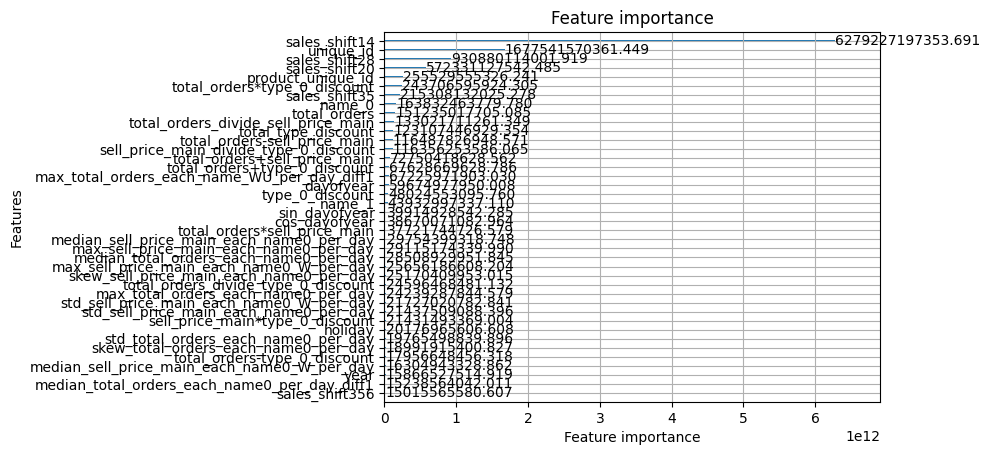

In [24]:
import lightgbm as lgb

lgb.plot_importance(models[0], importance_type="gain", max_num_features=40)


In [40]:


print("< only use unique_id in testset >")
test_id=test['unique_id'].unique()


test_preds=np.clip(test_preds,0.0, 26316)
test_preds=test_preds*test['dayofweek'].values




< only use unique_id in testset >


In [ ]:
test['id'] = test['unique_id'].astype(str) + "_" + test['date'].astype(str)
test['sales_hat_pr']=test_preds

In [ ]:

good_pred=pd.read_csv("/kaggle/input/submission-model/submission(67).csv")
test = good_pred.merge(test, on='id', how='left')


In [ ]:

test['sales_hat'] = test.apply(
    lambda row: row['sales_hat_pr'] if row['warehouse'] in ['Prague1', 'Prague2', 'Prague3'] else row['sales_hat'], axis=1
)


In [ ]:
test[['id','sales_hat']].to_csv("submission.csv",index=False)